<div style="background: url(background.jpeg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Prediktivno Bankarstvo</h1>


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from collections import Counter
from itertools import pairwise
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [10]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [11]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


In [12]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

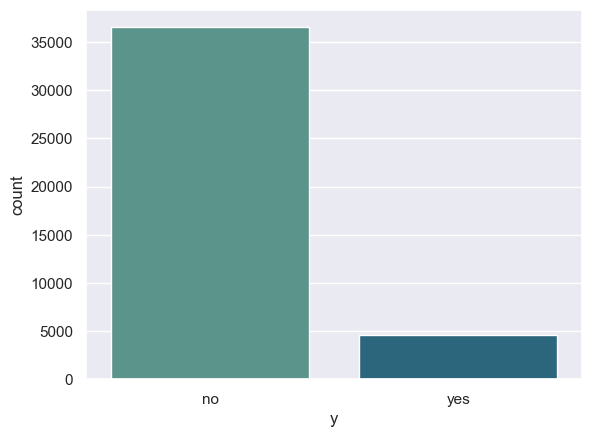

In [13]:
fig, ax = plt.subplots()

sns.countplot(x='y', data=df,
              palette=sns.color_palette("crest", 2))

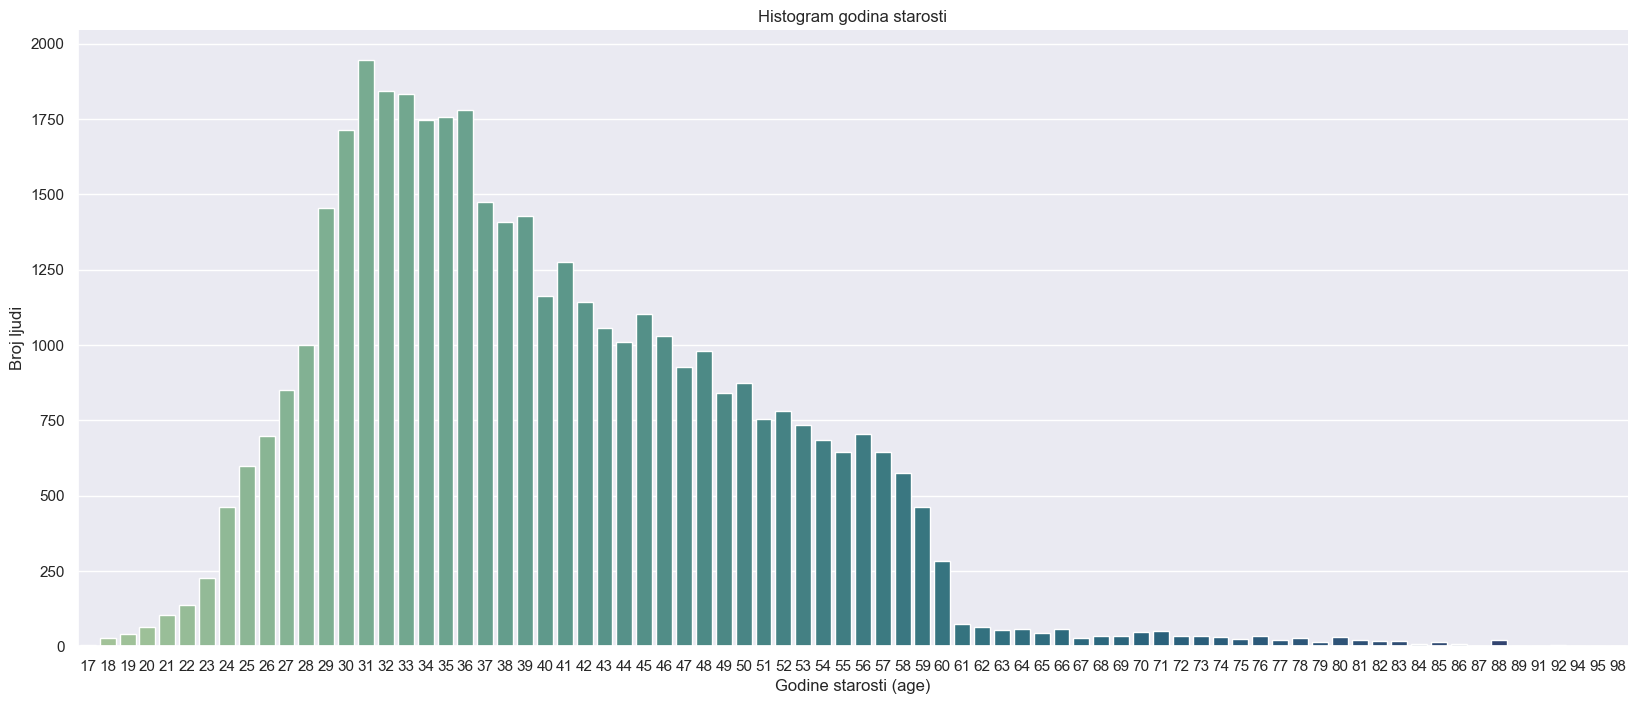

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

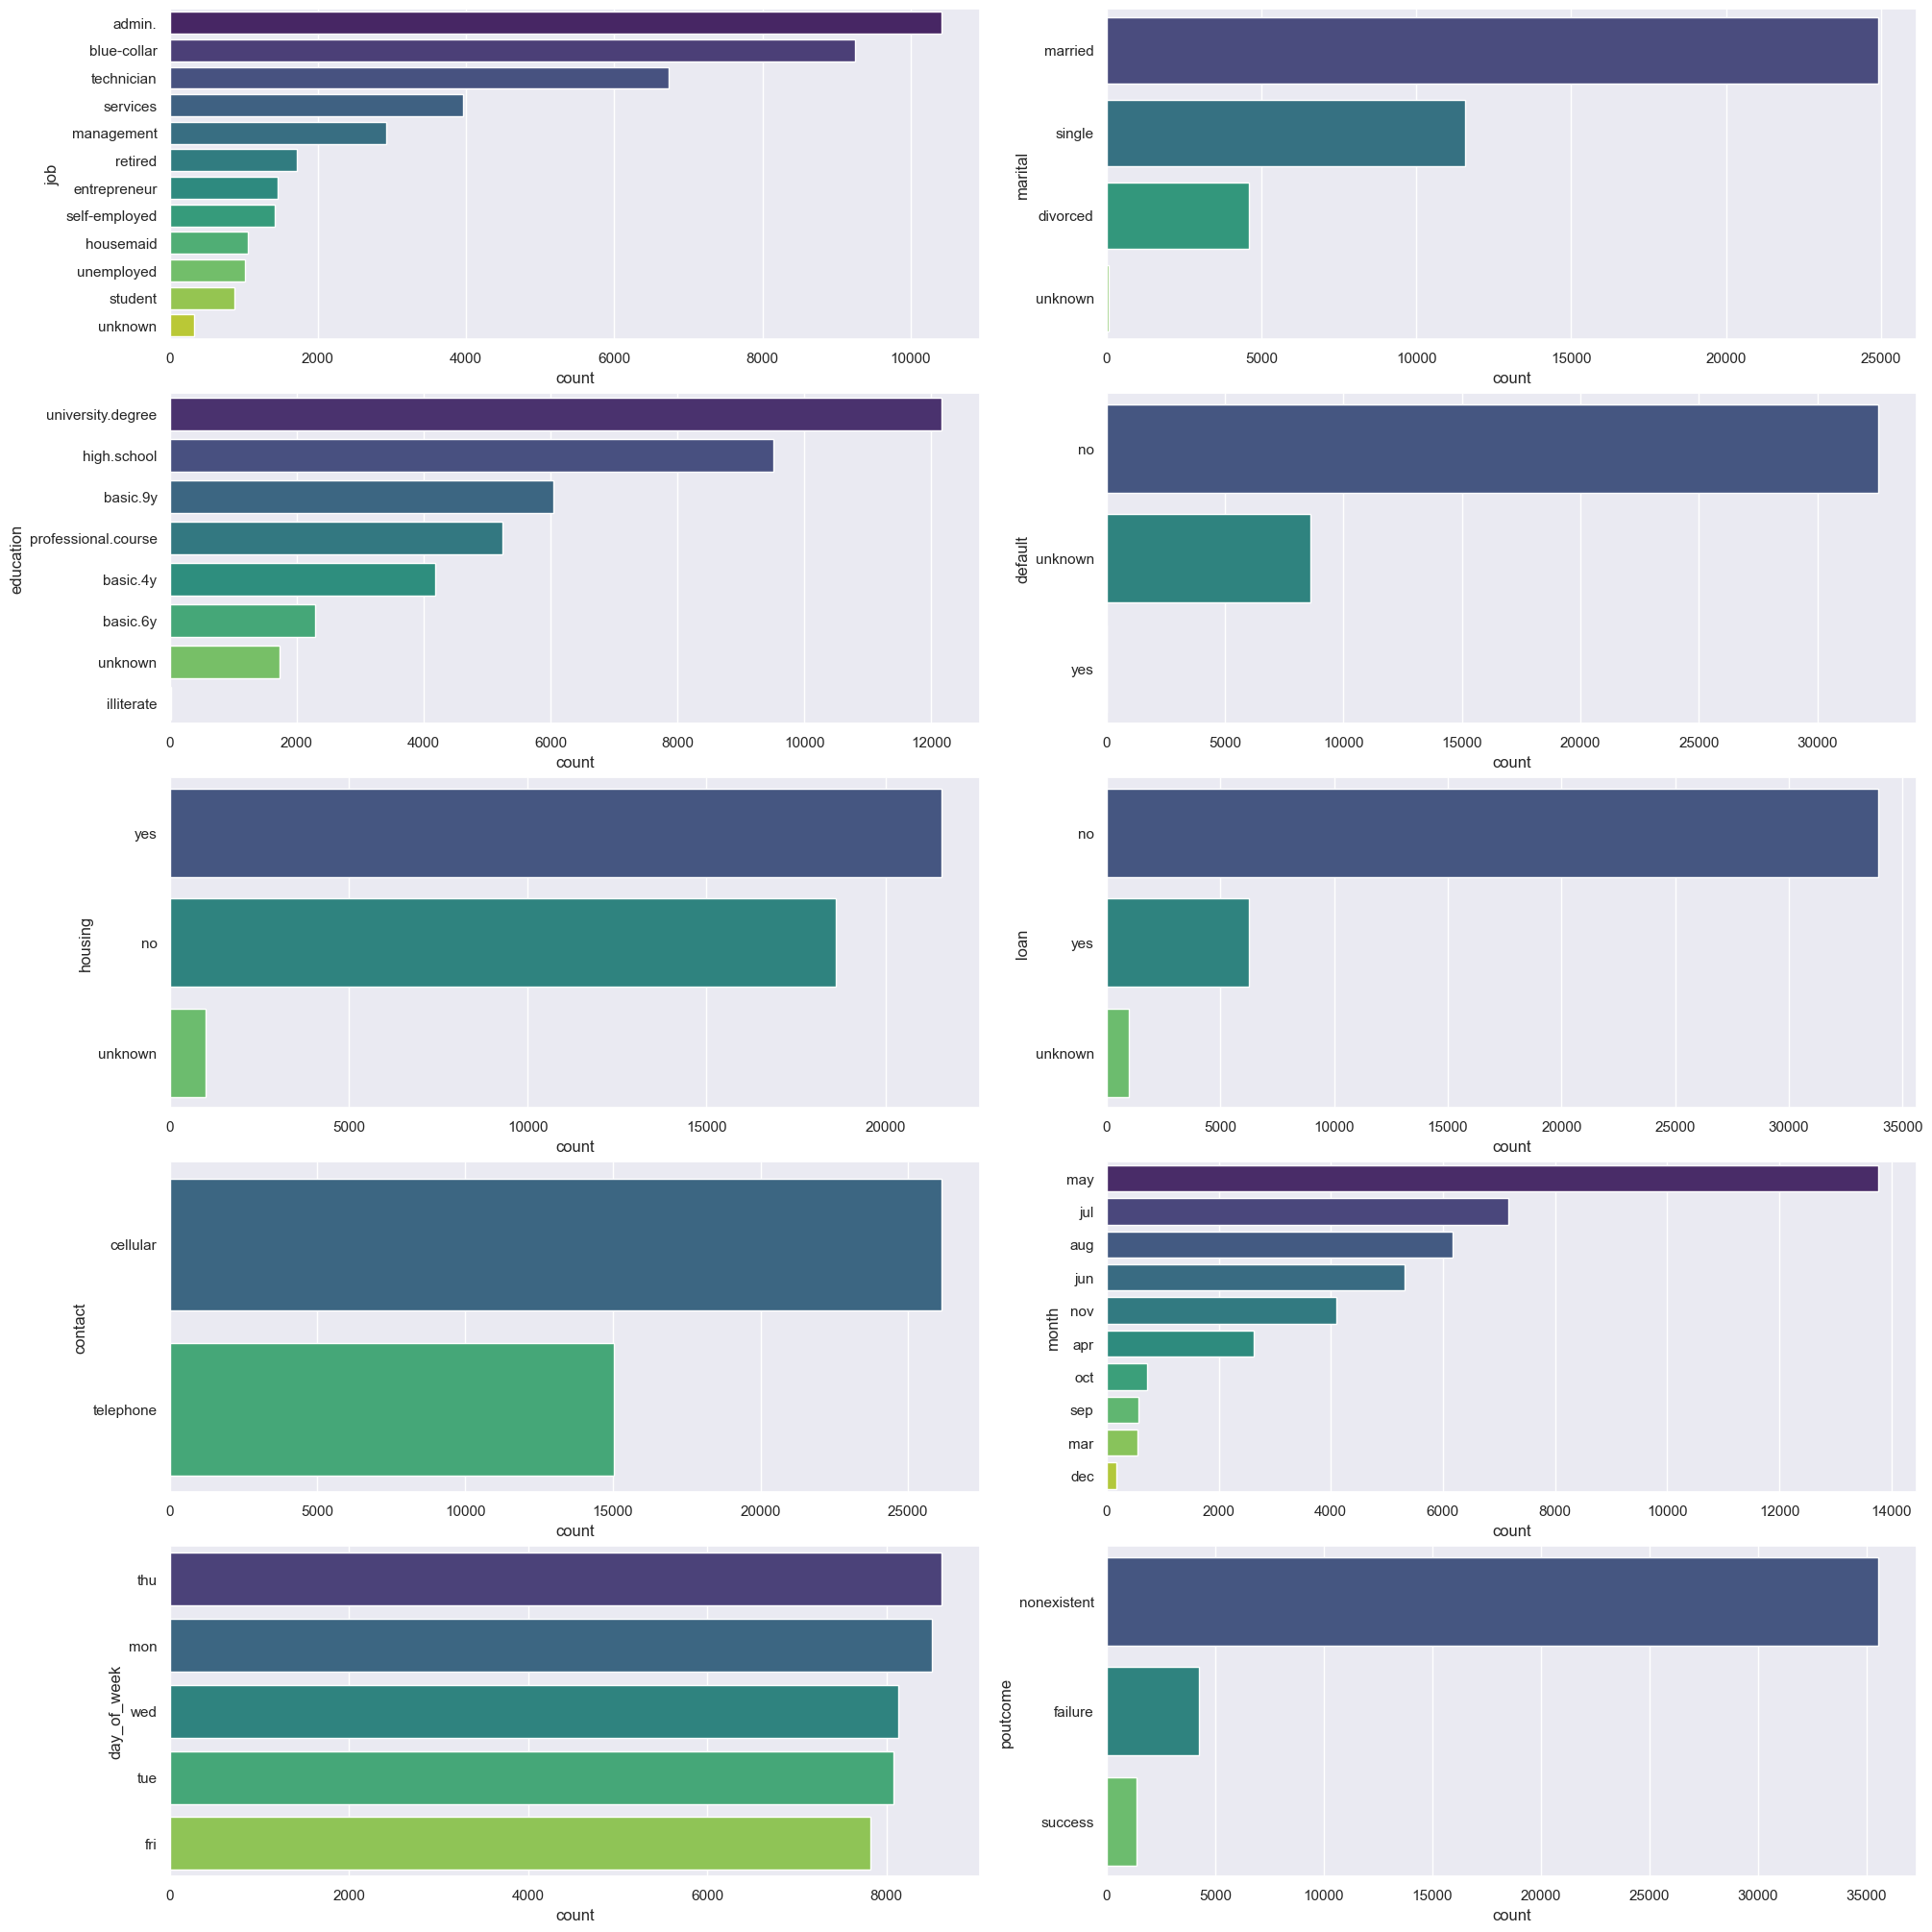

In [15]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

In [16]:
# check unknown values
columns_with_unknown = ['job', 'housing',
                        'loan', 'default', 'marital', 'education']

for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((df.groupby(val).size()/df[val].count())*100)

Column job: 

job
admin.           25.303663
blue-collar      22.475950
entrepreneur      3.537071
housemaid         2.575066
management        7.103294
retired           4.168691
self-employed     3.452045
services          9.632203
student           2.125644
technician       16.361384
unemployed        2.463317
unknown           0.801671
dtype: float64
Column housing: 

housing
no         45.204548
unknown     2.405014
yes        52.390438
dtype: float64
Column loan: 

loan
no         82.416675
unknown     2.405014
yes        15.178311
dtype: float64
Column default: 

default
no         79.112817
unknown    20.879895
yes         0.007288
dtype: float64
Column marital: 

marital
divorced    11.199106
married     60.523759
single      28.082791
unknown      0.194345
dtype: float64
Column education: 

education
basic.4y               10.144787
basic.6y                5.563113
basic.9y               14.685162
high.school            23.100282
illiterate              0.043728
professional.

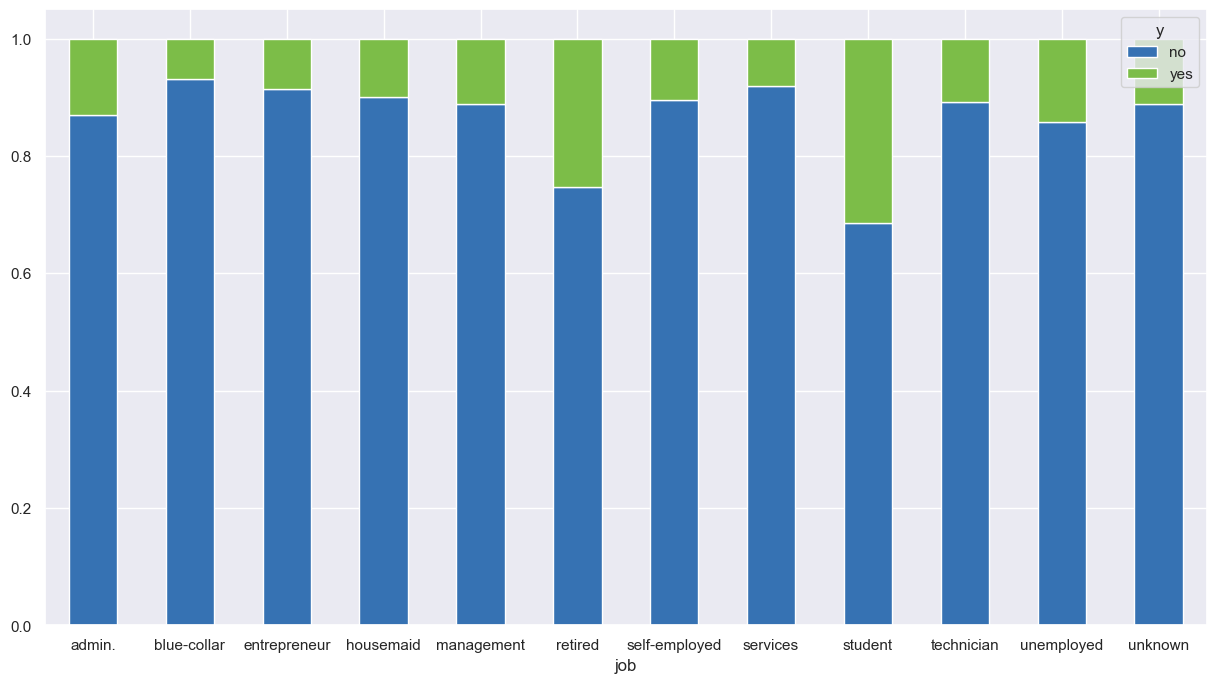

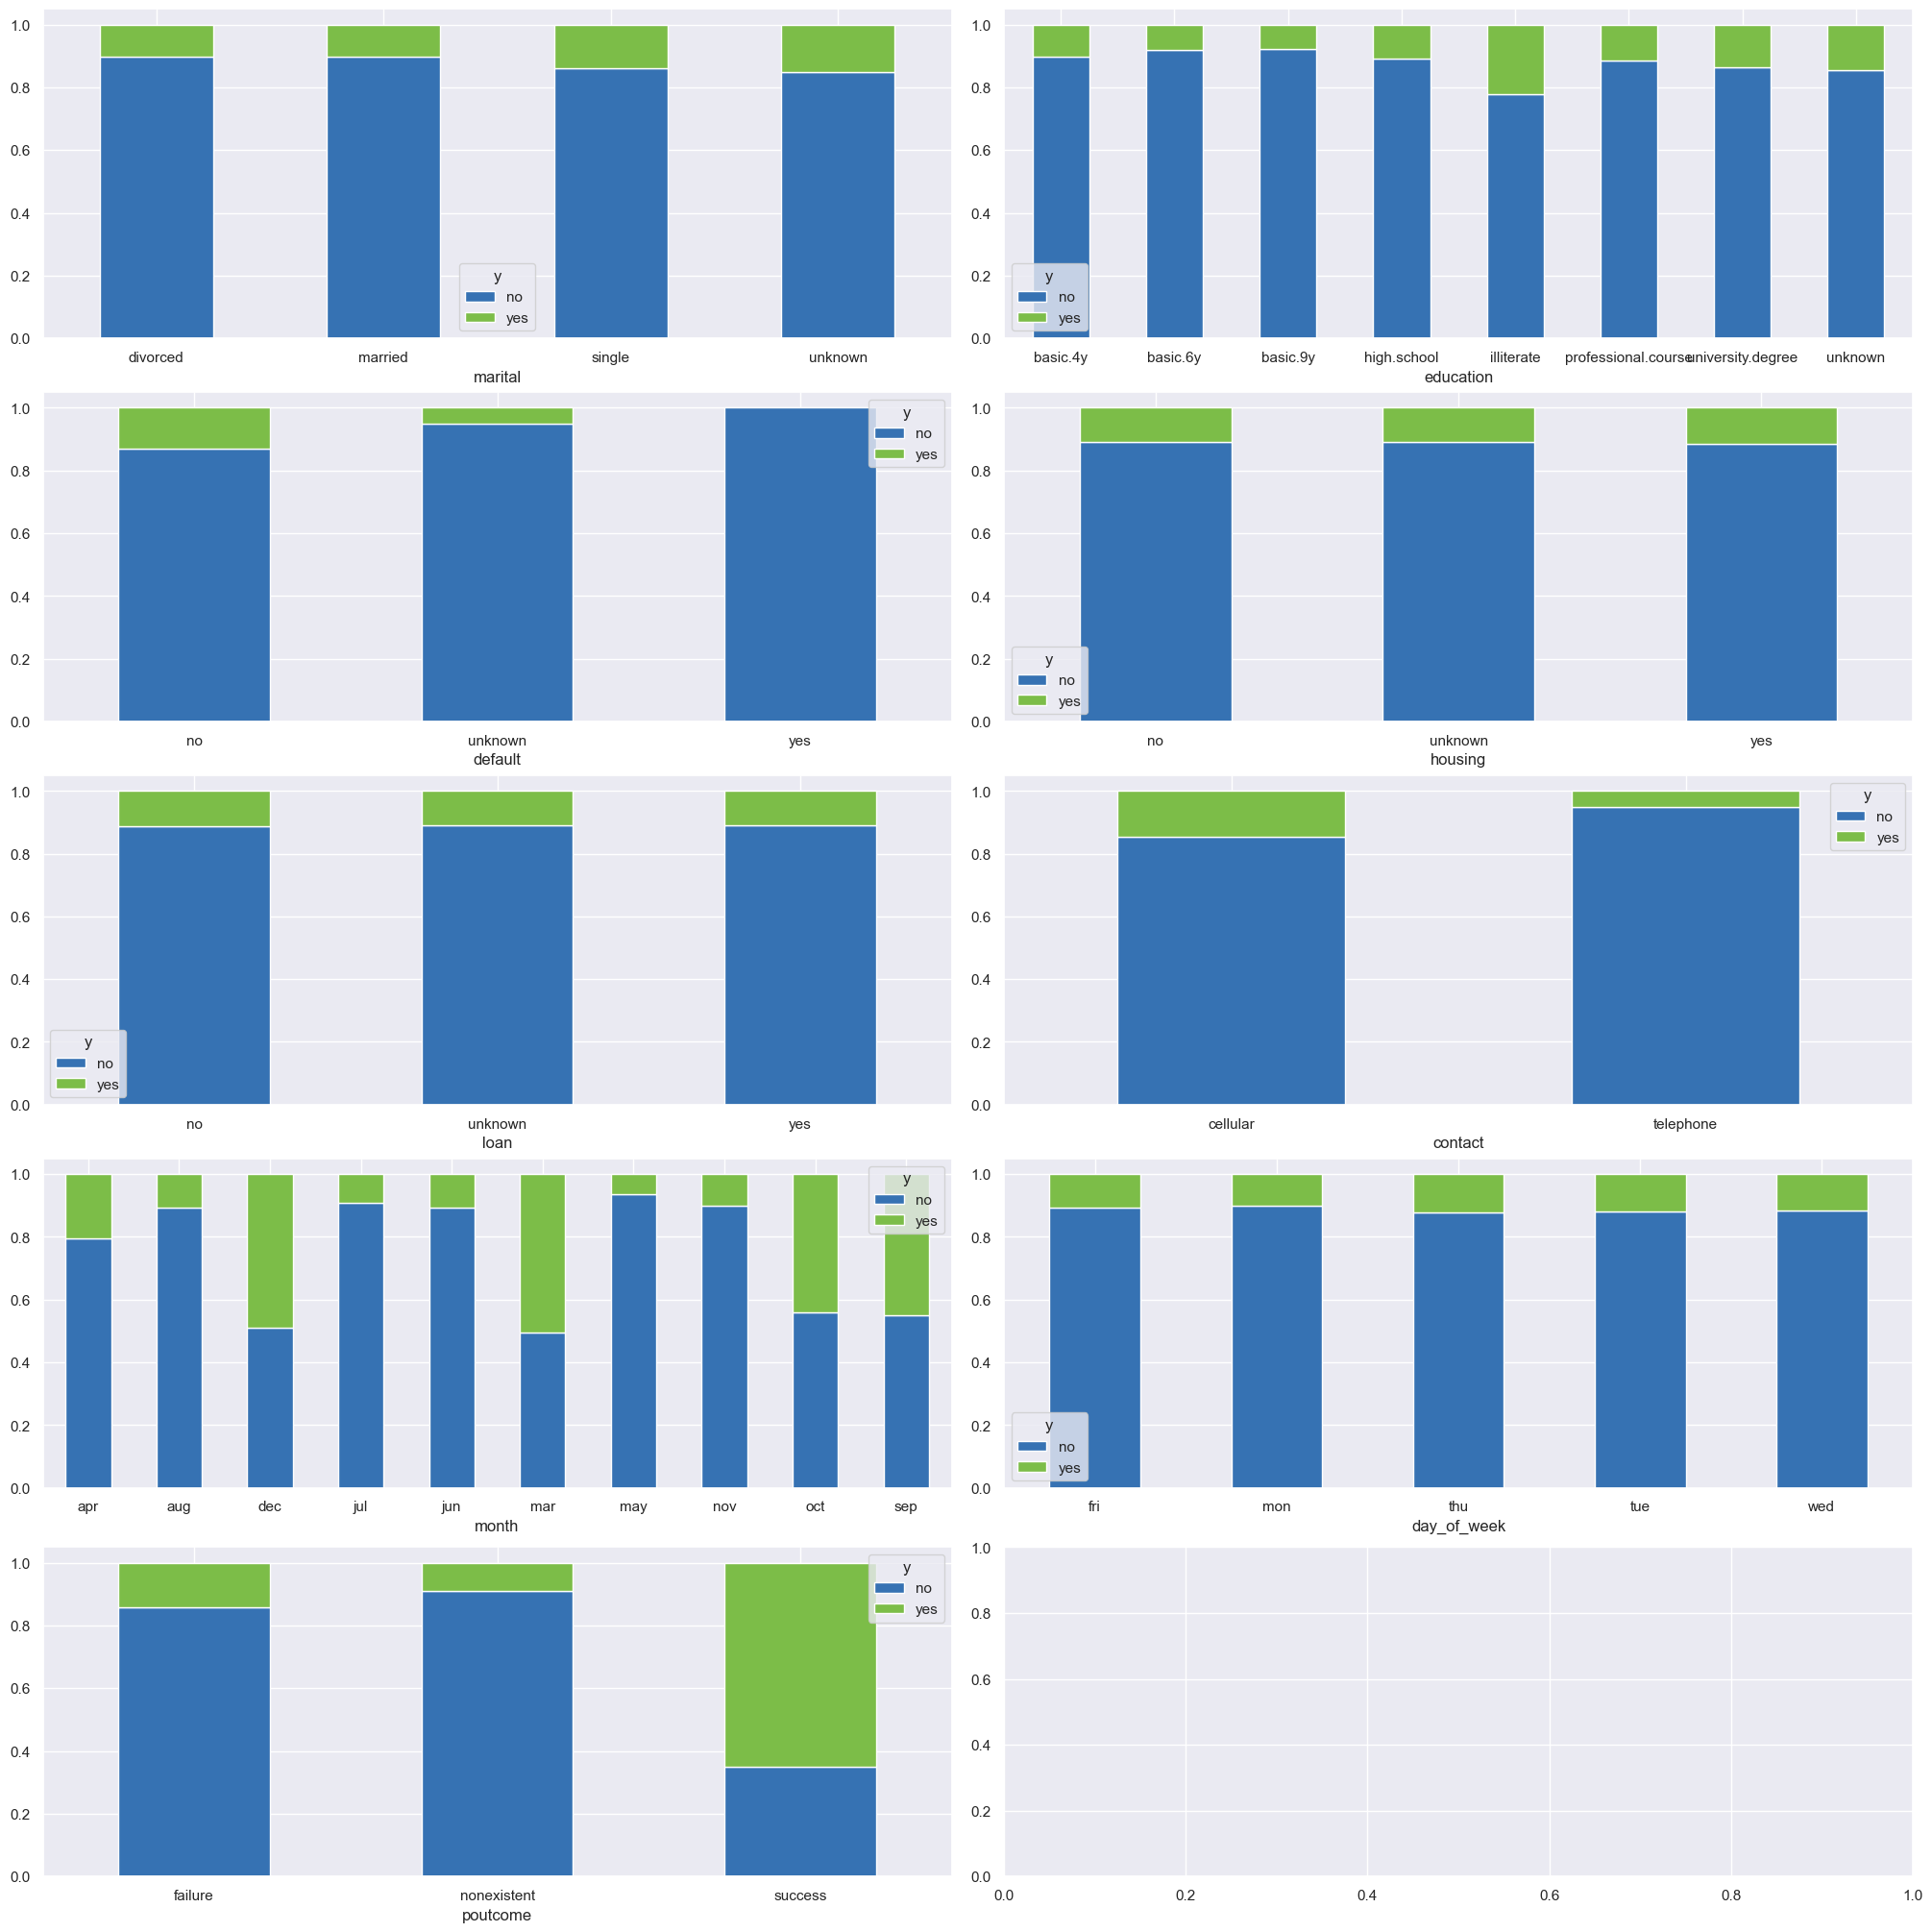

In [17]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8),
                     color=['#3672b3', '#7cbd48'])
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0,
                         color=['#3672b3', '#7cbd48'])
plt.show()

In [18]:
# lepo izgleda ali se crta 3min
# sns.pairplot(df, palette='viridis', hue='y')

## Šta raditi sa kategoričkim podacima?

1. **job**
    - imputacija unknown (management ili najfrekventnija)
2. **marital**
    - imputacija single (married)
3. **education**
    - izbaci illiterate (ima ih samo 18) ili ih stavi sve na basic.4y
4. **default**
    - izbaci yes
    - prebaci yes u no
    - izbaci celu kolonu (vrv ovo, jer je sve unknown ili no)
5. **housing**
    - imputacija unknown sa yes (najfrekv)
    - prediktivna imputacija (mozda overkill)
    - samo ostavimo i izbacimo nakon one-hot kodiranja
6. **loan**
    - unknown imputacija u no
7. **month**
    - spojimo sep+oct+nov+dec
    - spojimo apr+mart
8. **poutcome**
    - samo ostavimo i izbacimo non-existant iz one-hot


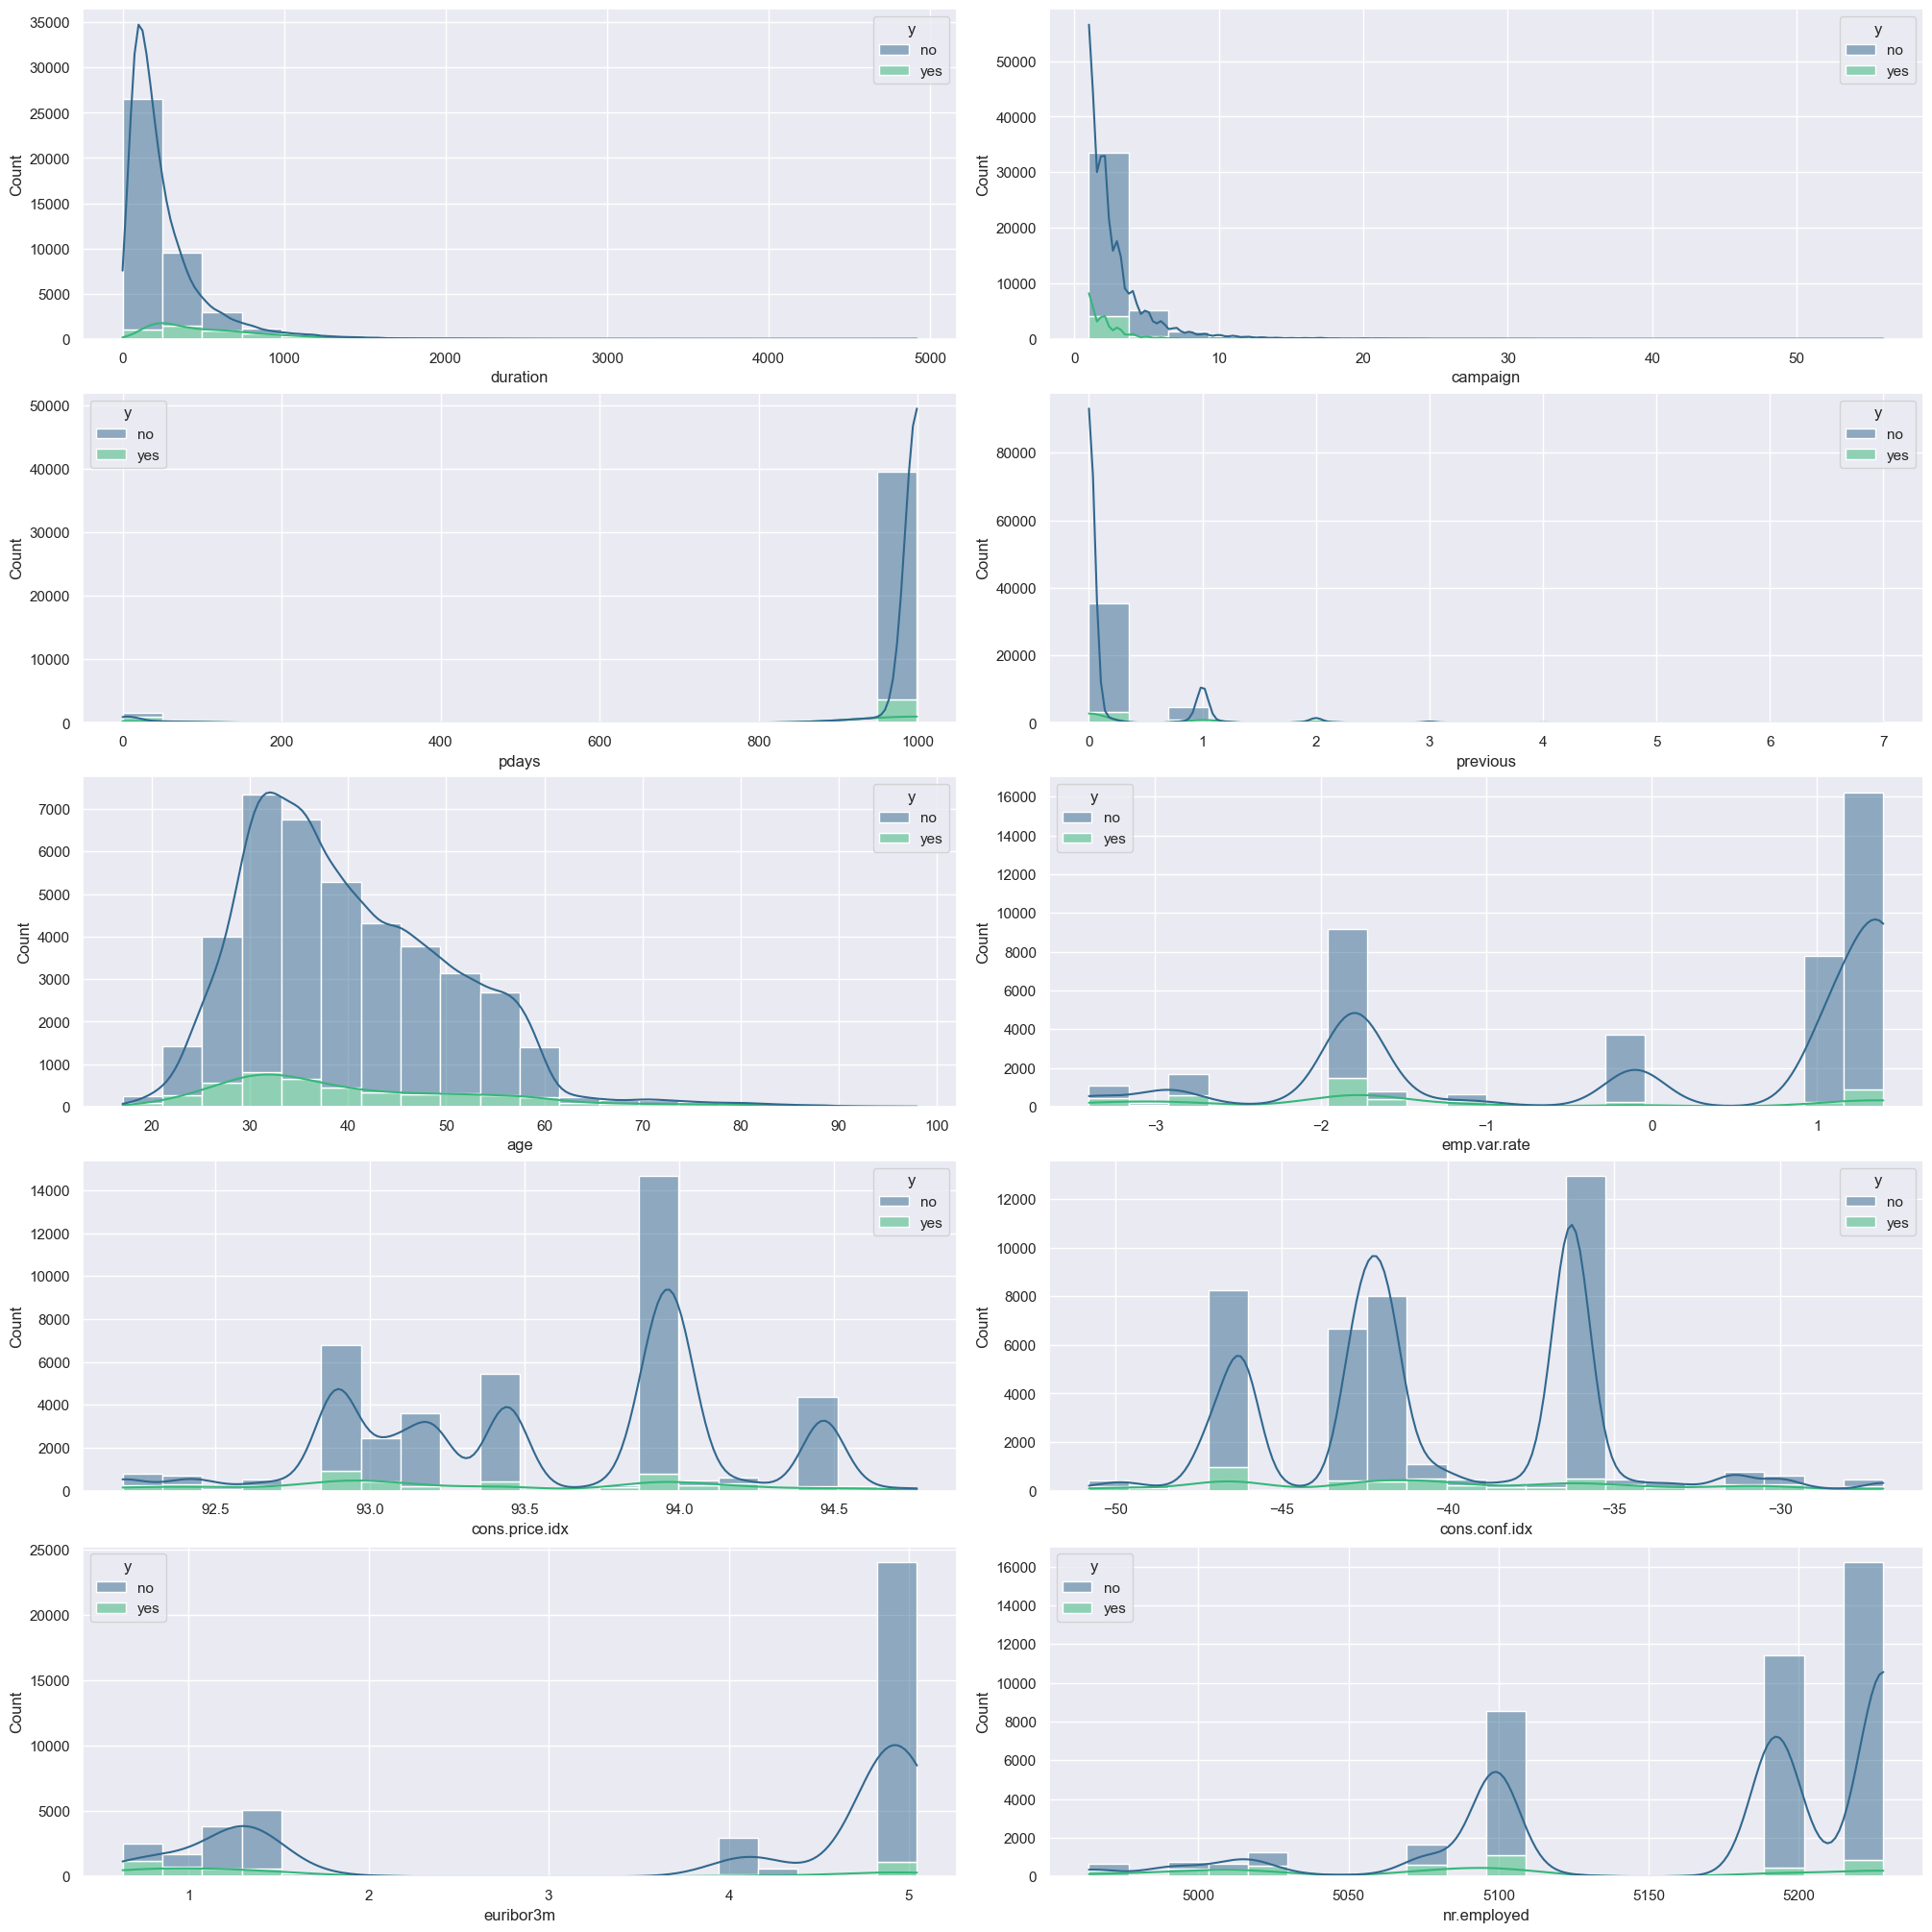

In [19]:
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

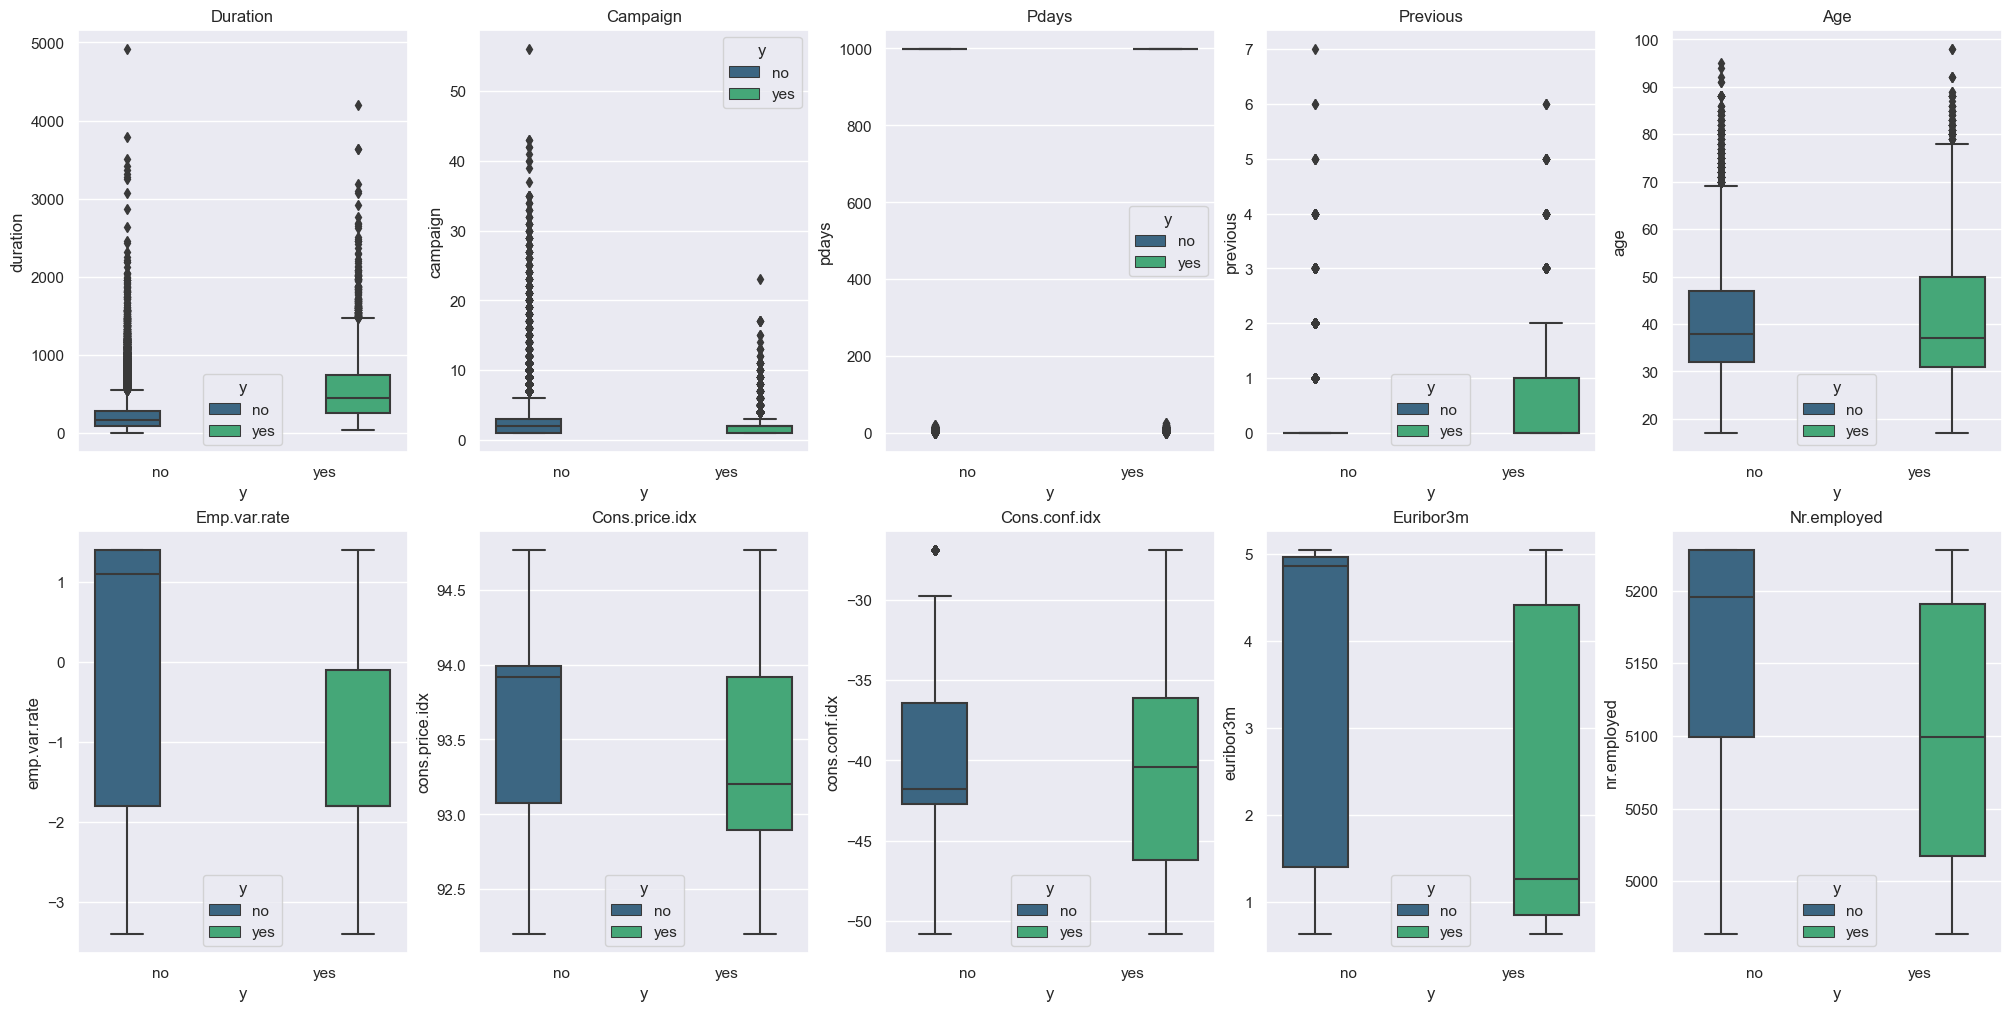

In [20]:
fig, axs = plt.subplots(2, len(numerical)//2,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, x='y', data=df, hue='y', ax=axs[i//5][i % 5],
                palette="viridis")
    axs[i//5][i % 5].set_title(f.capitalize())


plt.show()

# Sta raditi sa numerickim kolonama?

1. **campaign**
    - log transform i posle eventualno IQR
2. **age**
    - IQR
3. **duration**
    - log transform pa IQR eventualno
4. **pdays**
    - diskretizuj na 0 i 1 (999 da bude 0 jer to znaci da nije kontaktiran)
5. **previous**
    - diskretizuj na 0 i 1, jer je pramalo ovih koji nisu 0
6. **cons.conf.idx**
    - IQR

-   ostalo ne diramo


## Preprocesiranje


In [21]:
df = df.drop(columns=['default'])

In [22]:
df.loc[df['education'] == 'illiterate', 'education'] = 'basic.4y'

In [23]:
month_to_quartal = {'jan': 0, 'feb': 0, 'mar': 0,
                    'apr': 1, 'may': 1, 'jun': 1,
                    'jul': 2, 'aug': 2, 'sep': 2,
                    'oct': 3, 'nov': 3, 'dec': 3}

df['year_quartal'] = df['month'].map(month_to_quartal)
df = df.drop('month', axis=1)
print(df['year_quartal'].unique())
df.head()

[1 2 3 0]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,housemaid,married,basic.4y,no,no,telephone,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,no,no,telephone,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,yes,no,telephone,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,telephone,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,yes,telephone,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [24]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
unknown_job = le.transform(['unknown'])
df['job'] = df['job'].replace(unknown_job, np.nan)

In [25]:
le_edu = LabelEncoder()
df['education'] = le_edu.fit_transform(df['education'])
unknown_job = le_edu.transform(['unknown'])
df['education'] = df['education'].replace(unknown_job, np.nan)

In [26]:
df = df.drop(df[df['marital'] == 'unknown'].index)

In [27]:
df['housing'] = df['housing'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['marital'] = df['marital'].map(
    {'married': 1, 'single': 0, 'divorced': 2})
df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})

In [28]:
df.head()

,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,3.0,1,0.0,0.0,0.0,0,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,7.0,1,3.0,0.0,0.0,0,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7.0,1,3.0,1.0,0.0,0,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0.0,1,1.0,0.0,0.0,0,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7.0,1,3.0,0.0,1.0,0,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [29]:
def remove_outliers_standard_deviation(df, features, n) -> pd.DataFrame:
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3

        outlier_list_column = df[(
            df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_list.extend(outlier_list_column)

    return outlier_list

In [30]:
def remove_outliers_iqr(df, features) -> pd.DataFrame:

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(
            df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_column)

    return outlier_list

In [31]:
def remove_outliers_isolation_forest(df, contamination='auto',
                                     columns=[]) -> pd.DataFrame:

    clf = IsolationForest(random_state=42, contamination=contamination)

    clf.fit(df[columns])

    y_pred = clf.predict(df[columns])

    outlier_list = df[y_pred == -1].index
    return outlier_list

In [32]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [33]:
for column in ['campaign', 'duration']:
    log_transform(df, column)

In [34]:
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df['previous'] = df['previous'].apply(lambda x: 0 if x < 0.5 else 1)

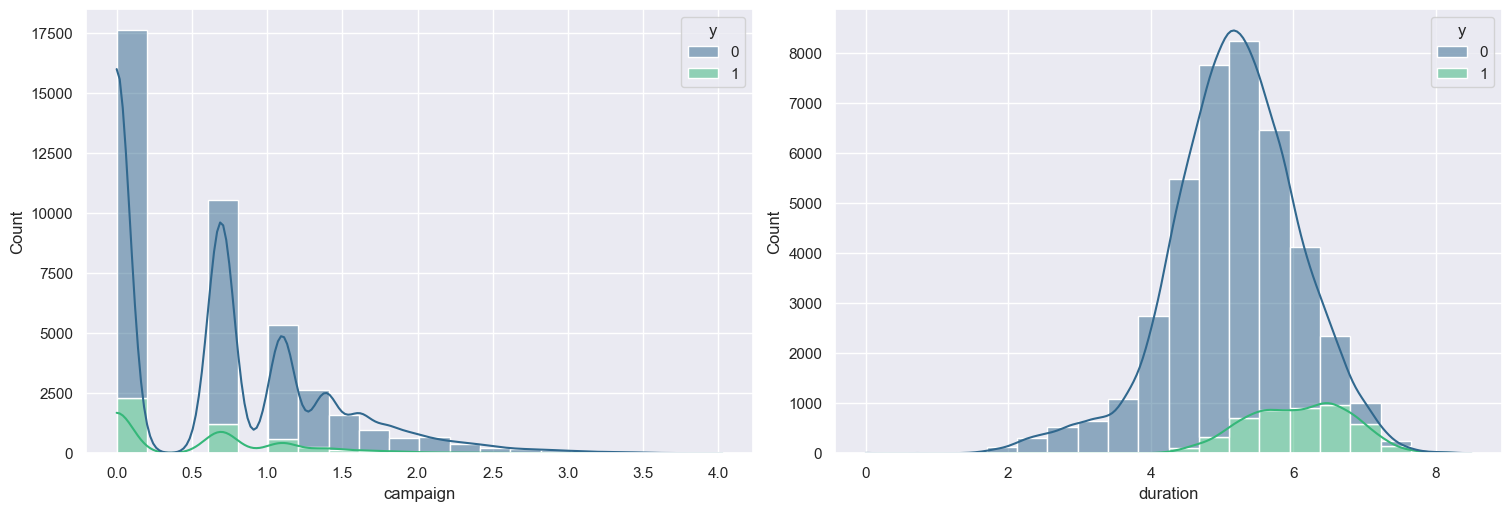

In [35]:
fig, axs = plt.subplots(1, 2,
                        figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration']):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i], bins=20, palette='viridis', kde=True)
plt.show()

In [36]:
print(f"Pre izbacivanja: {df.shape}")
outliers = remove_outliers_iqr(  # proveriti
    df, ['campaign', 'duration', 'age'])
df = df.drop(outliers, axis=0).reset_index(drop=True)
print(f"Nakon izbacivanja: {df.shape}")
print(f"Outliers: {len(outliers)}")

Pre izbacivanja: (41084, 20)
Nakon izbacivanja: (39364, 20)
Outliers: 1802


In [37]:
# outliers = remove_outliers_isolation_forest(df, contamination=0.1,
#                                             columns=['campaign', 'duration', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age'])
# df = df.drop(outliers, axis=0).reset_index(drop=True)
# print(f"Izbaceno {len(outliers)} outliera")

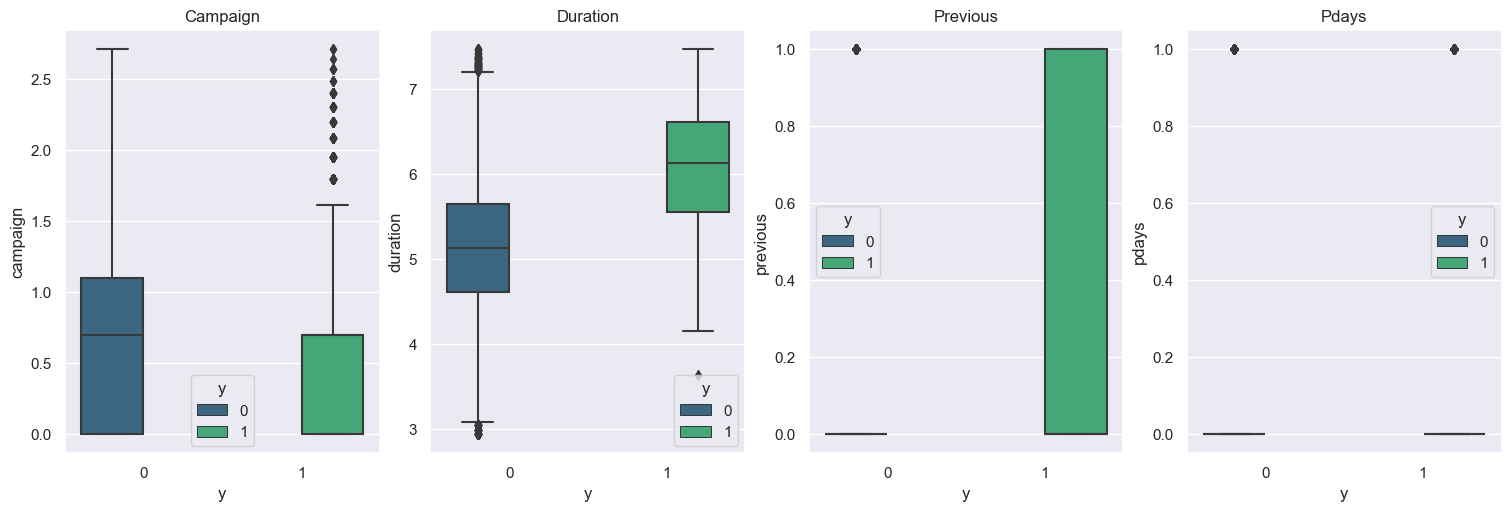

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration', 'previous', 'pdays']):
    sns.boxplot(y=f, data=df, hue='y', x='y', ax=axs[i], palette='viridis')
    axs[i].set_title(f.capitalize())
plt.show()

In [39]:
# pametniji nacin za age
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(17.0, 31.0), (31.0, 35.0), (35.0, 41.0), (41.0, 49.0), (49.0, 69.0)]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,4.0,3.0,1,0.0,0.0,0.0,0,mon,5.568345,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,4.0,7.0,1,3.0,0.0,0.0,0,mon,5.010635,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2.0,7.0,1,3.0,1.0,0.0,0,mon,5.424950,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,2.0,0.0,1,1.0,0.0,0.0,0,mon,5.023881,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,4.0,7.0,1,3.0,0.0,1.0,0,mon,5.730100,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [40]:
df.describe()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
count,39364.000000,39060.000000,39364.000000,37740.000000,38406.000000,38406.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000,39364.000000
mean,2.080353,3.656912,0.826771,3.179889,0.536557,0.155158,0.636013,5.229734,0.616350,0.035616,0.134819,0.108622,93.577317,-40.504789,3.655324,5168.658144,0.110202,1.567422
std,1.391111,3.565796,0.603021,1.625939,0.498668,0.362060,0.481151,0.819459,0.645100,0.185334,0.341534,1.558100,0.573226,4.586058,1.717667,70.818489,0.313146,0.715971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944439,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.682131,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000,0.000000,1.000000
50%,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,5.220356,0.693147,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,3.000000,7.000000,1.000000,5.000000,1.000000,0.000000,1.000000,5.780744,1.098612,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,2.000000
max,4.000000,10.000000,2.000000,5.000000,1.000000,1.000000,1.000000,7.465083,2.708050,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,3.000000


In [41]:
df = pd.get_dummies(
    data=df, columns=['day_of_week', 'poutcome']).astype('float64')


df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,3.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,3.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,3.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
imputer = KNNImputer(n_neighbors=1, missing_values=np.nan)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,3.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,3.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,3.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df['job'] = le.inverse_transform(df['job'].astype(int))
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [44]:
df['education'] = le_edu.inverse_transform(
    df['education'].astype(int))
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree'], dtype=object)

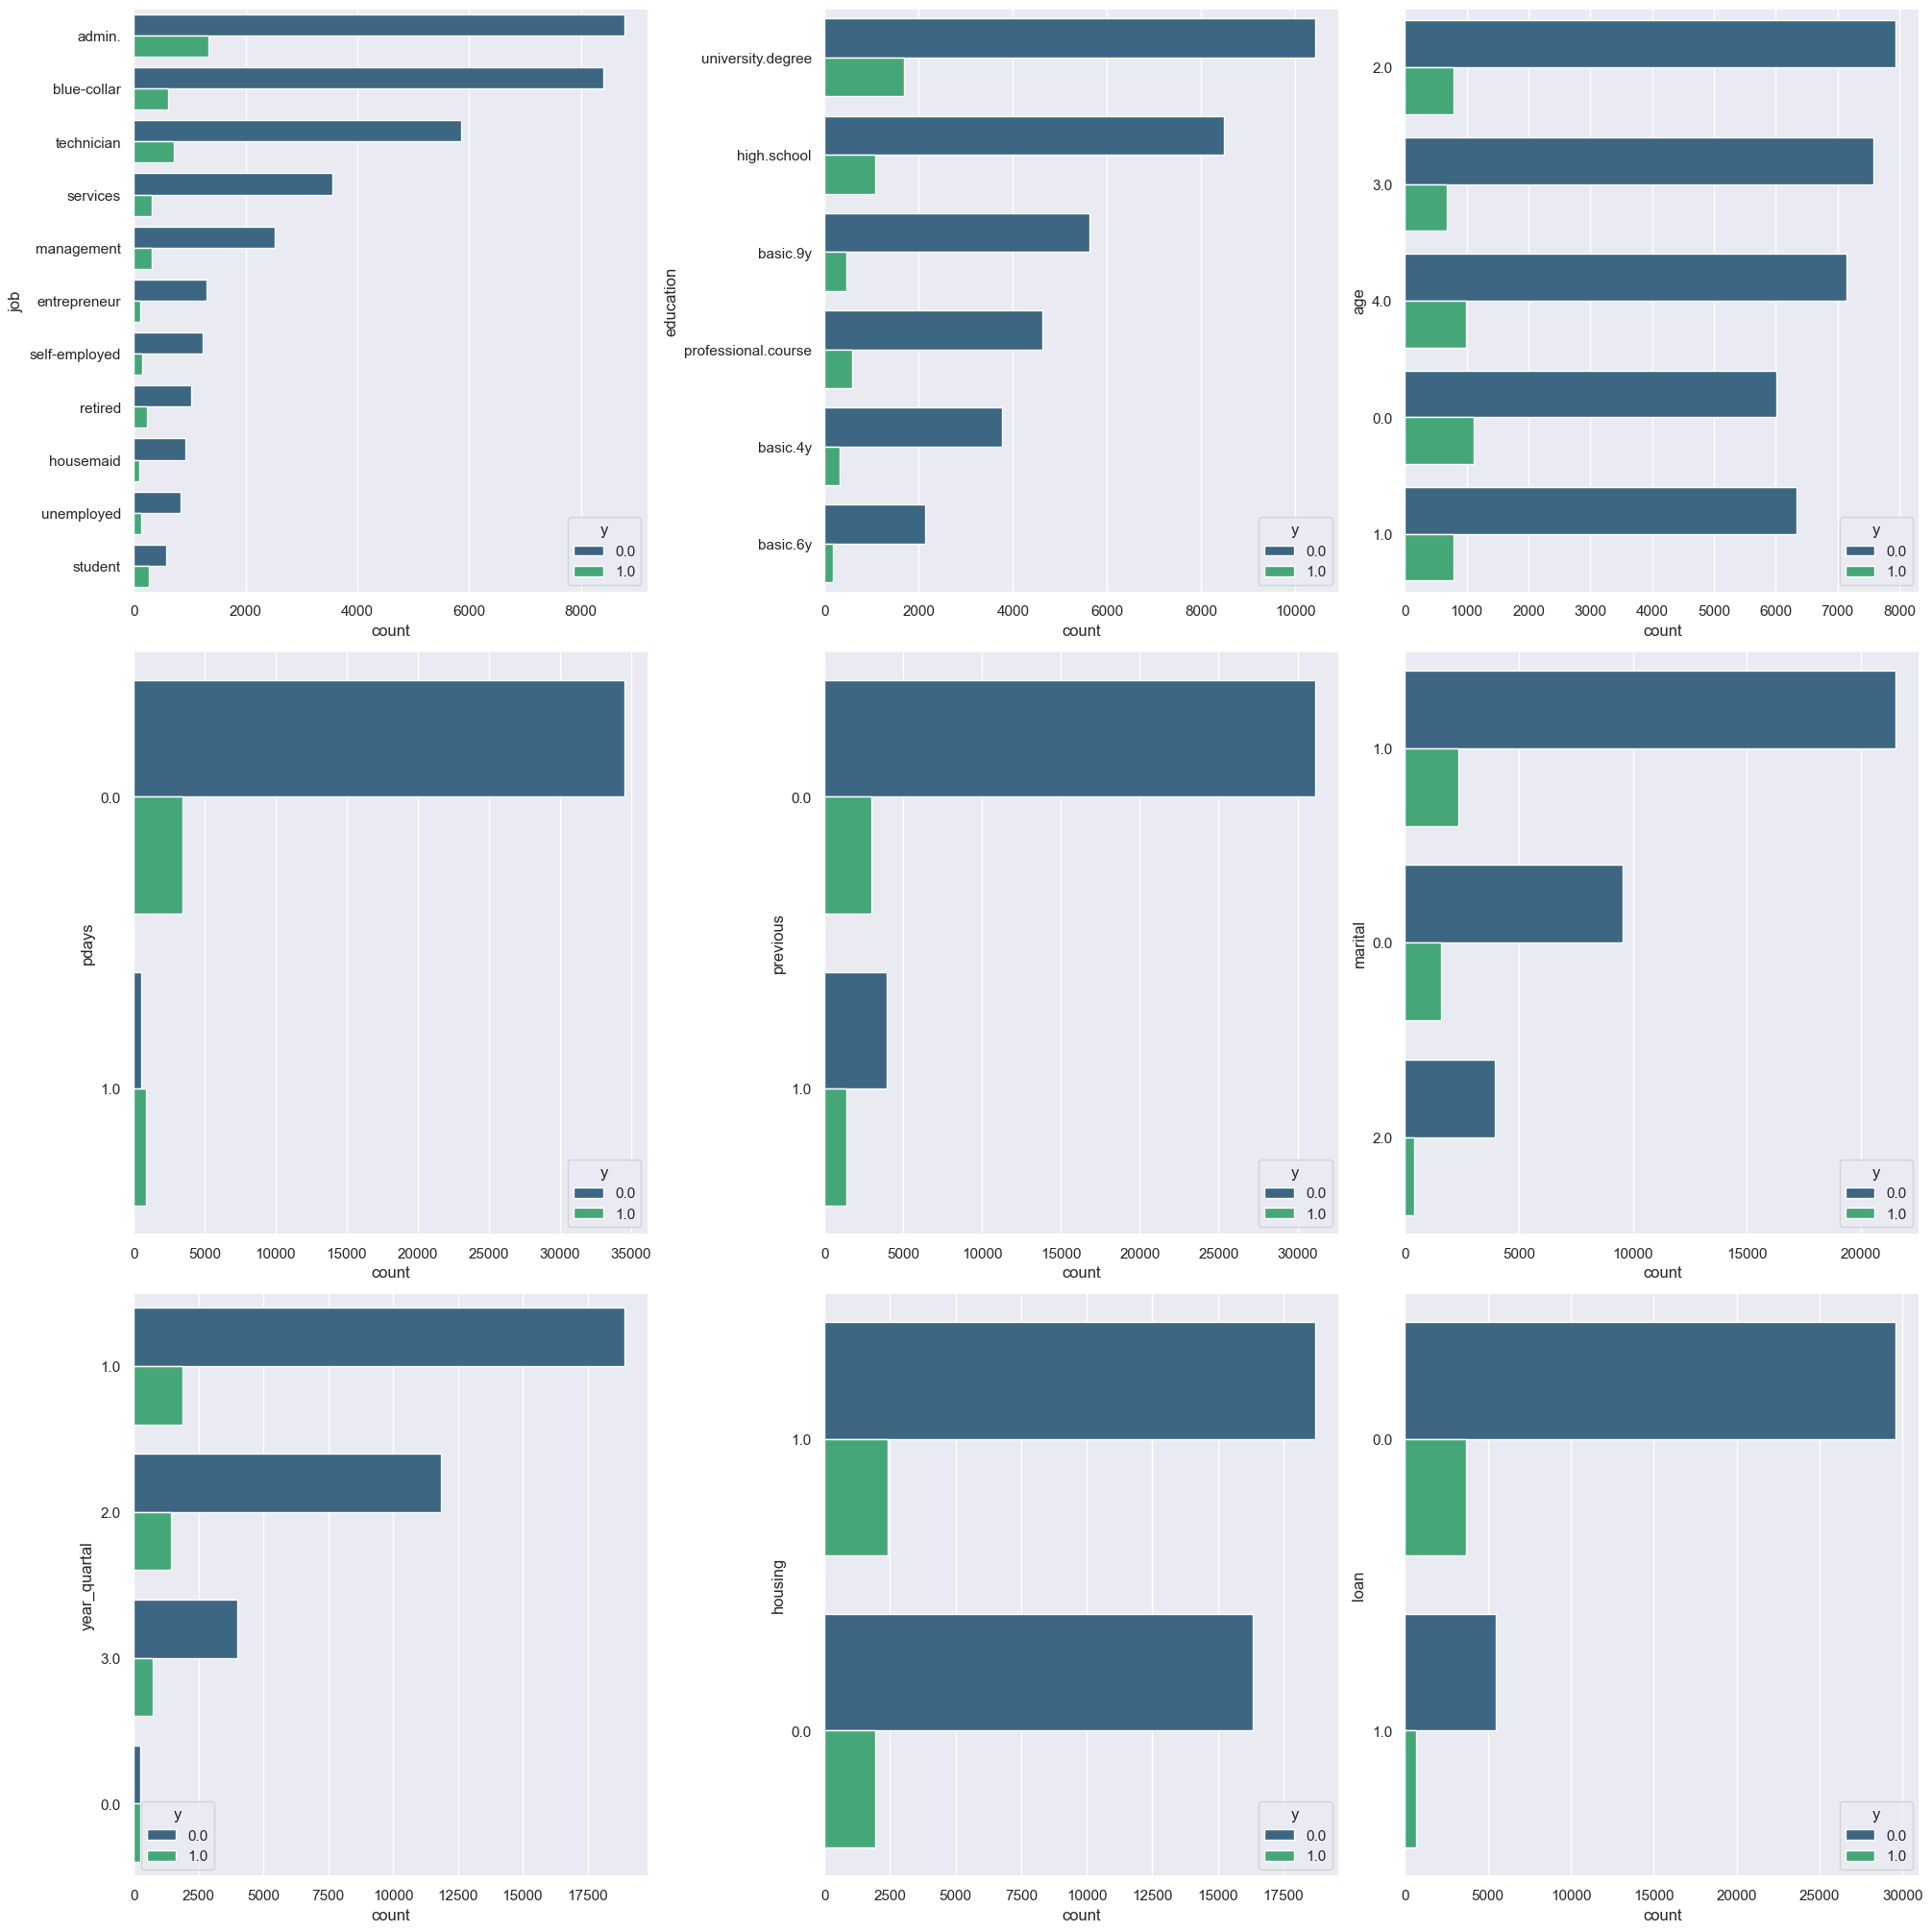

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(['job', 'education', 'age', 'pdays', 'previous', 'marital', 'year_quartal', 'housing', 'loan']):
    sns.countplot(y=f, data=df, hue='y',
                  ax=axs[i//3][i % 3],
                  order=df[f].value_counts().index, palette='viridis')

In [46]:
df = pd.get_dummies(
    data=df, columns=['job', 'year_quartal', 'education']).astype('float64')  # probaj sa i bez age i education

df.head()

,age,marital,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,4.0,1.0,0.0,0.0,0.0,5.568345,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.0,0.0,0.0,0.0,5.010635,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,5.424950,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,1.0,0.0,0.0,0.0,5.023881,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,1.0,0.0,1.0,0.0,5.730100,0.0,0.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
df = df.drop(columns=['poutcome_nonexistent'])

<Axes: >

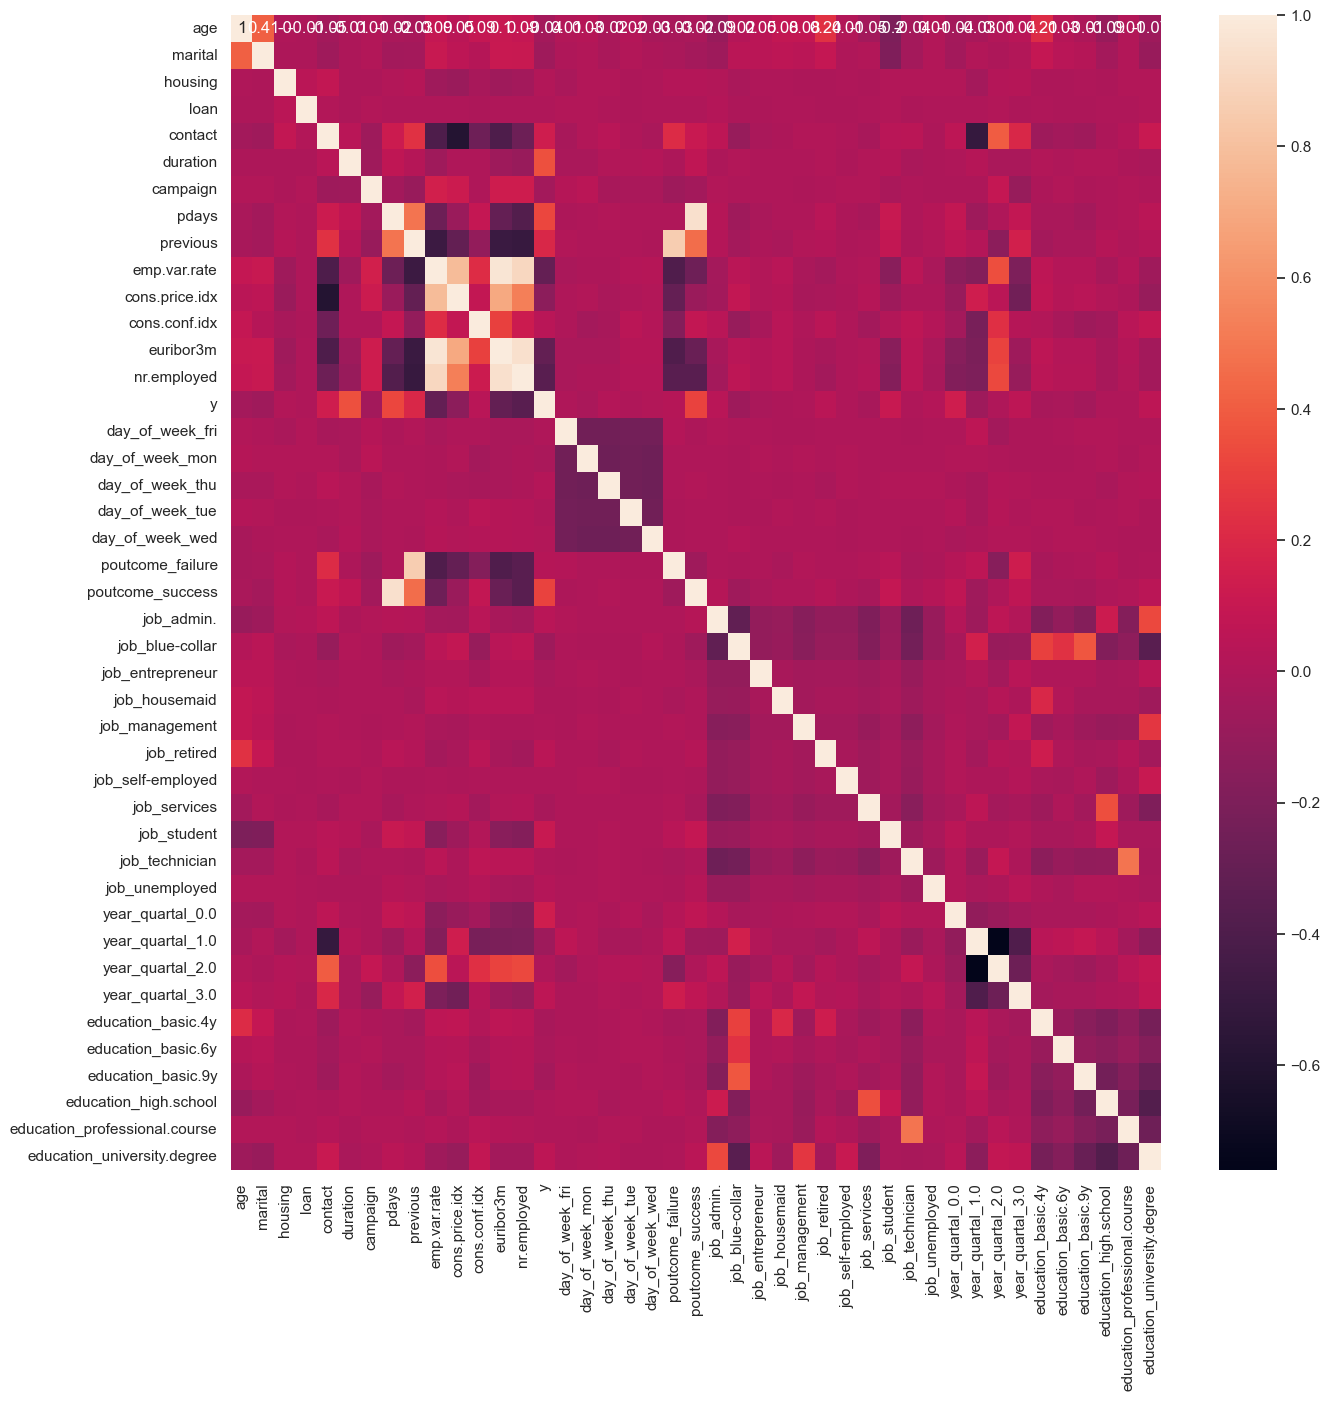

In [48]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, annot=True, ax=ax)

In [49]:
# emp.var.rate, nr.employed i euribor3m imaju skoro pa 1.0 korelaciju pa jedna od navedenih kolona moze da se otkloni

df = df.drop(columns=['emp.var.rate', 'nr.employed'])

In [50]:
df.dtypes

age                              float64
marital                          float64
housing                          float64
loan                             float64
contact                          float64
duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
y                                float64
day_of_week_fri                  float64
day_of_week_mon                  float64
day_of_week_thu                  float64
day_of_week_tue                  float64
day_of_week_wed                  float64
poutcome_failure                 float64
poutcome_success                 float64
job_admin.                       float64
job_blue-collar                  float64
job_entrepreneur                 float64
job_housemaid                    float64
job_management  

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39364 entries, 0 to 39363
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39364 non-null  float64
 1   marital                        39364 non-null  float64
 2   housing                        39364 non-null  float64
 3   loan                           39364 non-null  float64
 4   contact                        39364 non-null  float64
 5   duration                       39364 non-null  float64
 6   campaign                       39364 non-null  float64
 7   pdays                          39364 non-null  float64
 8   previous                       39364 non-null  float64
 9   cons.price.idx                 39364 non-null  float64
 10  cons.conf.idx                  39364 non-null  float64
 11  euribor3m                      39364 non-null  float64
 12  y                              39364 non-null 

In [52]:
# probaj i norm i std
# scaler = Normalizer()
# cols_to_scale = ['duration',
#                  'campaign', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx']
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
# df.head()

In [53]:
scaler = StandardScaler()
cols_to_scale = ['euribor3m', 'duration', 'age',
                 'campaign', 'cons.price.idx',	'cons.conf.idx']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,age,marital,housing,loan,contact,duration,campaign,pdays,previous,cons.price.idx,...,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,1.379956,1.0,0.0,0.0,0.0,0.413217,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.379956,1.0,0.0,0.0,0.0,-0.267374,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.057762,1.0,1.0,0.0,0.0,0.238228,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.057762,1.0,0.0,0.0,0.0,-0.251210,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.379956,1.0,0.0,1.0,0.0,0.610612,-0.955445,0.0,0.0,0.726917,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

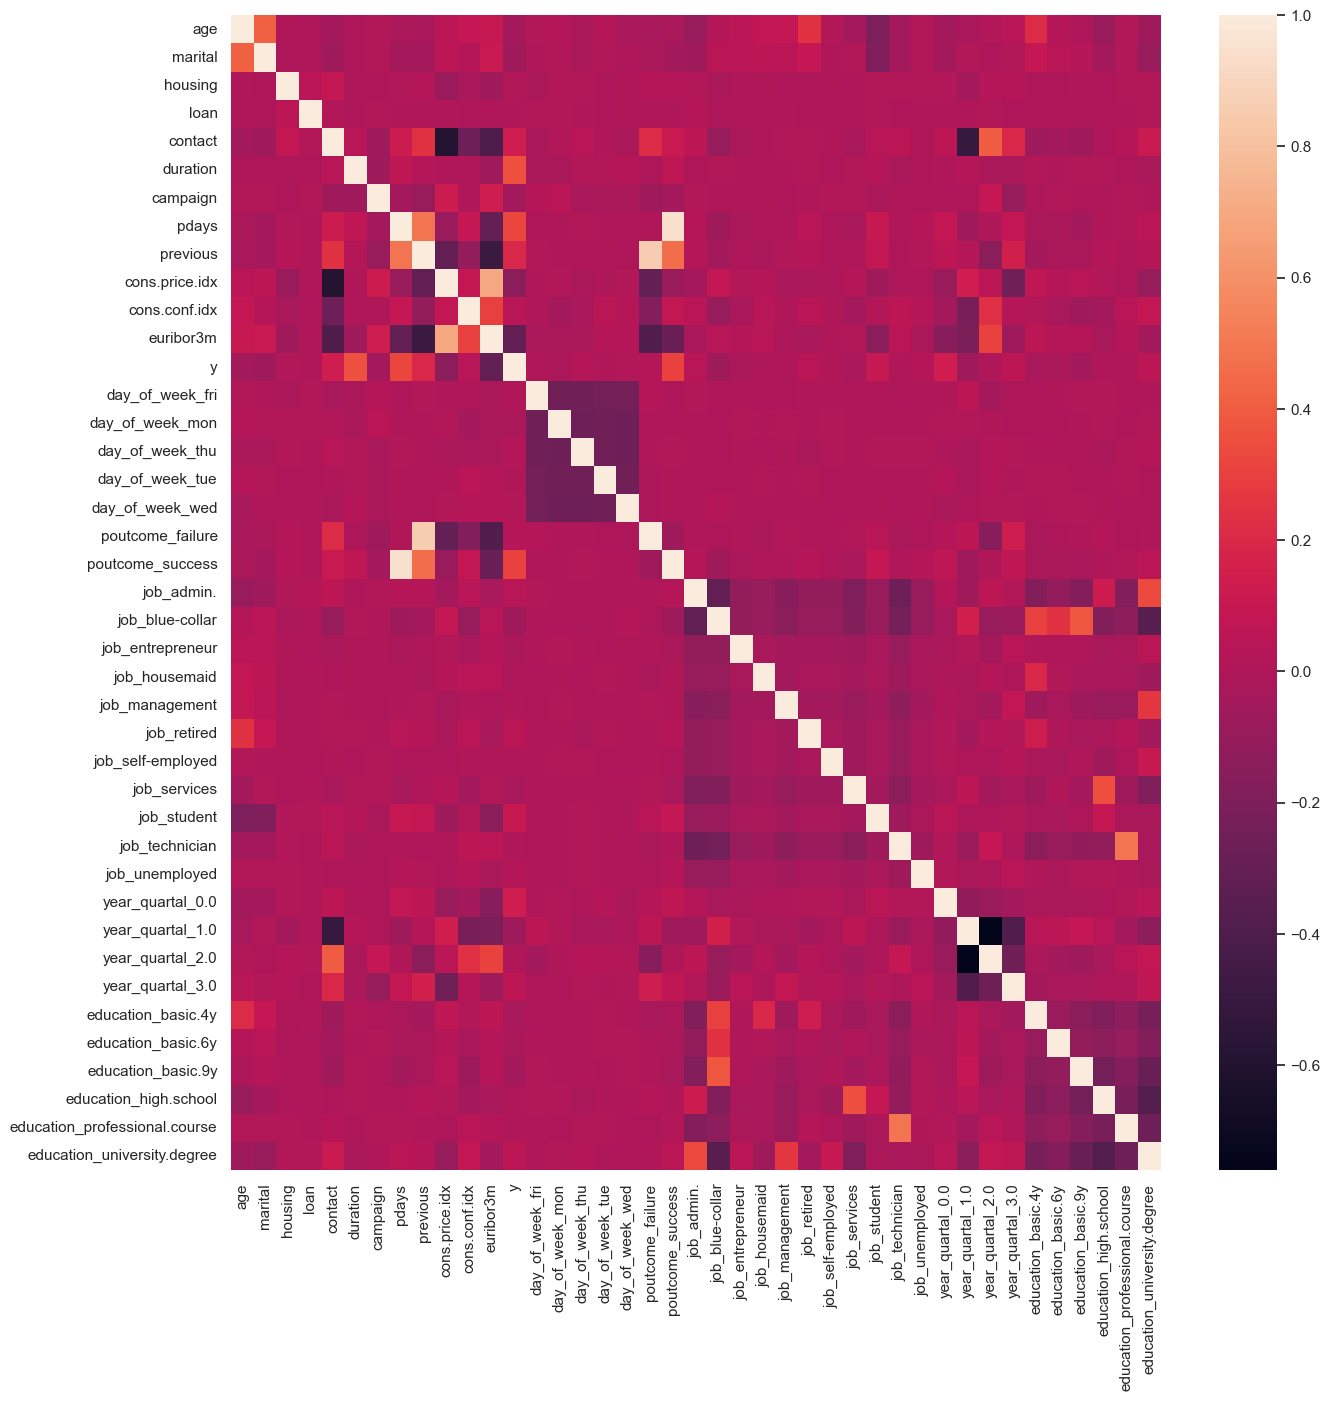

In [54]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


In [55]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm",  "CV-AUC", "CV-Accuracy", "CV-F1",
             "CV-Precision", "CV-Recall", "CV-LogLoss",
             "AUC", "Accuracy", "F1",])
results.set_index('Algorithm', inplace=True)

<Axes: xlabel='y', ylabel='count'>

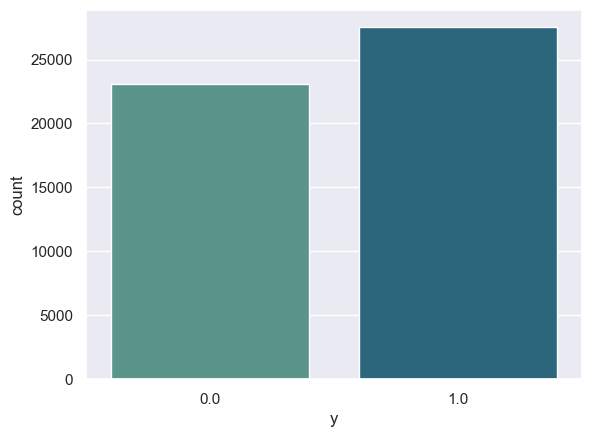

In [57]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [58]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

In [59]:
def cross_validate_models(classifiers, X, y, cv=5, results=results):
    for name in classifiers:
        print(f"{name}... ", end="")
        classifier = classifiers[name]
        scoring_metrics = ['accuracy', 'f1', 'roc_auc',
                           'precision', 'recall', 'neg_log_loss']
        cv_results = cross_validate(
            classifier, X, y, cv=cv, scoring=scoring_metrics)
        acc = cv_results['test_accuracy'].mean()
        f1 = cv_results['test_f1'].mean()
        auc = cv_results['test_roc_auc'].mean()
        precision = cv_results['test_precision'].mean()
        recall = cv_results['test_recall'].mean()
        log_loss = cv_results['test_neg_log_loss'].mean()
        results.loc[name, 'CV-F1'] = f1
        results.loc[name, 'CV-AUC'] = auc
        results.loc[name, 'CV-Accuracy'] = acc
        results.loc[name, 'CV-Precision'] = precision
        results.loc[name, 'CV-Recall'] = recall
        results.loc[name, 'CV-LogLoss'] = log_loss

In [60]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):
    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        results.loc[name, "F1"] = f1
        results.loc[name, "AUC"] = roc_auc
        results.loc[name, "Accuracy"] = acc

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False, cmap=cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

In [60]:
classifiers_to_test = [RandomForestClassifier, AdaBoostClassifier,
                       BaggingClassifier, RidgeClassifier, SVC, MLPClassifier, XGBClassifier]
classifiers = {

    'Random Forest': RandomForestClassifier(),

    'AdaBoost': AdaBoostClassifier(),

    'Bagging': BaggingClassifier(),

    'Ridge': RidgeClassifier(),

}

# results = test_models(classifiers, X_train, X_test, y_train, y_test, results)

Random Forest (balanced)... 

AdaBoost (balanced)... Bagging (balanced)... Ridge (balanced)... SVC (balanced)... Neural Network (balanced)... XGBoost (balanced)... 
Random Forest (balanced):DONE; AdaBoost (balanced):DONE; Bagging (balanced):DONE; Ridge (balanced):DONE; SVC (balanced):DONE; Neural Network (balanced):DONE; XGBoost (balanced):DONE; 

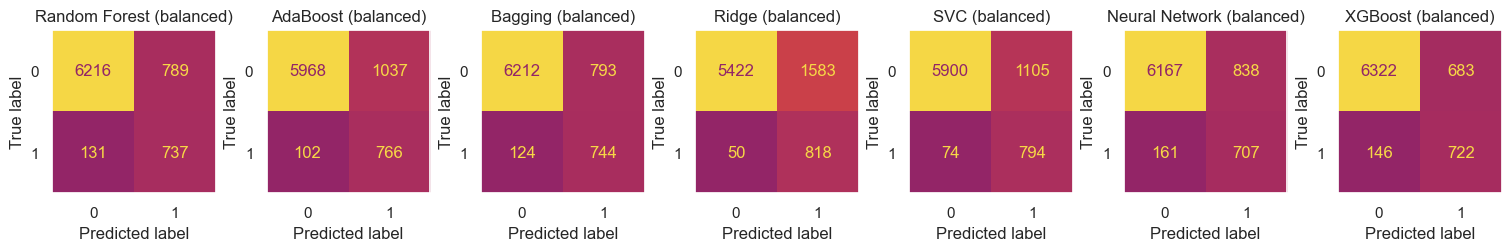

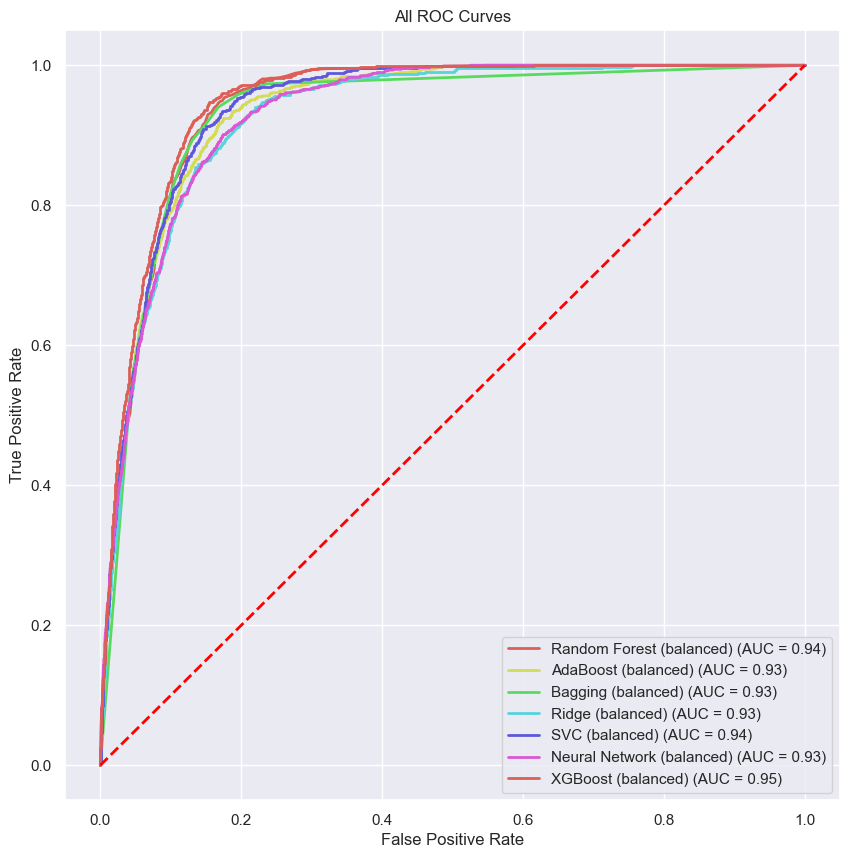

In [61]:
classifiers_balanced = {
    'Random Forest (balanced)': RandomForestClassifier(),
    'AdaBoost (balanced)': AdaBoostClassifier(),
    'Bagging (balanced)': BaggingClassifier(),
    'Ridge (balanced)': RidgeClassifier(),
    'SVC (balanced)': SVC(),
    'Neural Network (balanced)': MLPClassifier(),
    'XGBoost (balanced)': XGBClassifier(),
}
classifiers_balanced_cv = {
    'Random Forest (balanced)': make_pipeline(SMOTEENN(random_state=42), RandomForestClassifier()),
    'AdaBoost (balanced)': make_pipeline(SMOTEENN(random_state=42), AdaBoostClassifier()),
    'Bagging (balanced)': make_pipeline(SMOTEENN(random_state=42), BaggingClassifier()),
    'Ridge (balanced)': make_pipeline(SMOTEENN(random_state=42), RidgeClassifier()),
    'SVC (balanced)': make_pipeline(SMOTEENN(random_state=42), SVC()),
    'Neural Network (balanced)': make_pipeline(SMOTEENN(random_state=42), MLPClassifier()),
    'XGBoost (balanced)': make_pipeline(SMOTEENN(random_state=42), XGBClassifier()),
}

cross_validate_models(classifiers_balanced_cv, X_train,
                      y_train, results=results)
print()

results = test_models(classifiers_balanced, X_resampled,

                      X_test, y_resampled, y_test, results)

In [62]:
results.sort_values(by='AUC', ascending=False)

,CV-AUC,CV-Accuracy,CV-F1,CV-Precision,CV-Recall,CV-LogLoss,AUC,Accuracy,F1
Algorithm,,,,,,,,,
XGBoost (balanced),0.943726,0.890667,0.627778,0.502435,0.836599,-0.338243,0.947401,0.894703,0.635284
Random Forest (balanced),0.938226,0.878854,0.607179,0.472427,0.849568,-0.321272,0.94115,0.883145,0.615706
SVC (balanced),0.936566,0.848973,0.567958,0.414723,0.900865,NaN,0.939476,0.850248,0.573907
AdaBoost (balanced),0.930648,0.855228,0.57196,0.424187,0.87781,-0.656265,0.934499,0.855328,0.573568
Bagging (balanced),0.926027,0.879458,0.606721,0.473646,0.843804,-1.702256,0.930578,0.883526,0.618711
Neural Network (balanced),0.927042,0.872853,0.580722,0.457256,0.797983,-0.873446,0.930205,0.873111,0.585993
Ridge (balanced),0.926011,0.791305,0.497622,0.338699,0.937752,NaN,0.927679,0.792582,0.500459


In [63]:
from sklearn.model_selection import KFold, cross_val_score

clf = RandomForestClassifier(random_state=42)

k_folds = KFold(n_splits=5)

scores = cross_val_score(clf, X_resampled, y_resampled, cv=k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96621221 0.95869973 0.96709811 0.99911076 0.99822152]
Average CV Score:  0.9778684673014322
Number of CV Scores used in Average:  5


In [64]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X_resampled, y_resampled, cv=cv)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.98214991 0.98195231 0.9809643  0.9813595  0.98234752]
Average CV Score:  0.9817547095244368
Number of CV Scores used in Average:  5


In [65]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1


custom_cv = custom_cv_2folds(X)
scores = cross_val_score(clf, X_resampled, y_resampled, cv=custom_cv)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1.]
Average CV Score:  1.0
Number of CV Scores used in Average:  2


In [ ]:
from sklearn.model_selection import RepeatedKFold

random_state = 12883823
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=random_state)

for train, test in rkf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train], X_resampled.iloc[test]
    y_train, y_test = y_resampled.iloc[train], y_resampled.iloc[test]

    rf_classifier = RandomForestClassifier(random_state=random_state)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\n")

## Optimizacija Hiperparametara


In [83]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3]
}

xgb_classifier = XGBClassifier()

grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier, param_grid=param_grid,
    cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
0.9986485690695002


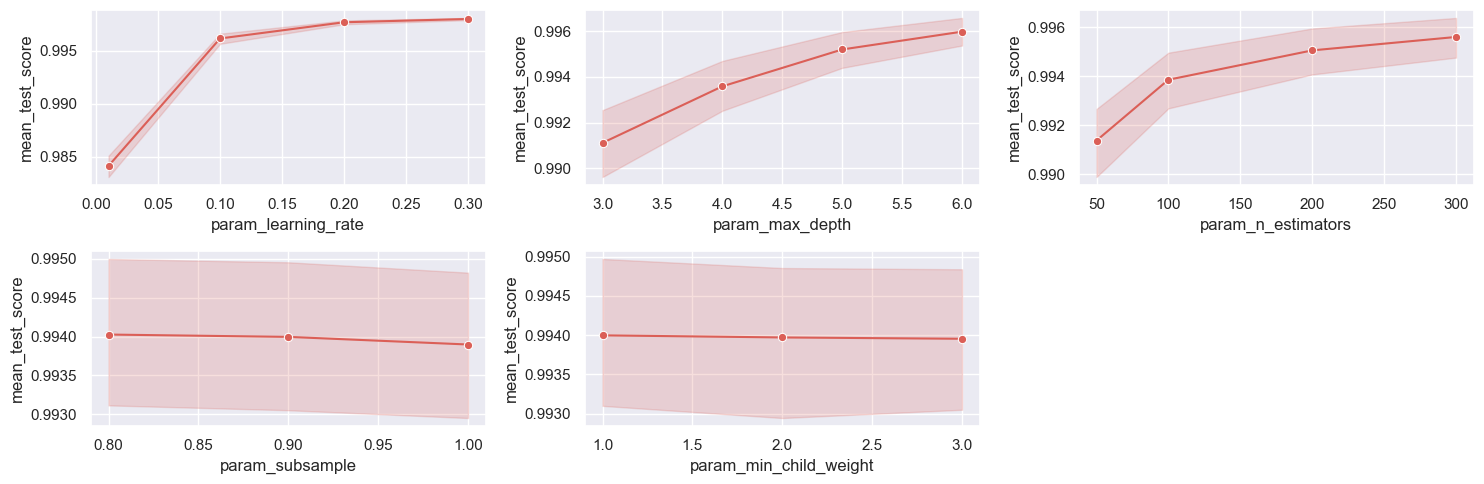

In [84]:
results_gcv = pd.DataFrame(grid_search_xgb.cv_results_)

plt.figure(figsize=(15, 5))

for i, param in enumerate(param_grid):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=f'param_{param}', y='mean_test_score',
                 data=results_gcv, marker='o')
plt.tight_layout()
plt.show()

In [87]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9],
    'min_child_weight': [1, 2]
}

param_dist_random = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3]
}


xgb_classifier = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier, param_distributions=param_dist_random,
    n_iter=10, cv=5, random_state=42)

randomized_search_xgb.fit(X_train, y_train)

print(randomized_search_xgb.best_params_)
print(randomized_search_xgb.best_score_)

best_params_random = randomized_search_xgb.best_params_

for k in param_grid.keys():
    param_grid[k] = [item for item in param_grid[k]
                     if item <= best_params_random[k]]

grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier, param_grid=param_grid,
    cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2}
0.9713474126219588
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
0.99830718696057


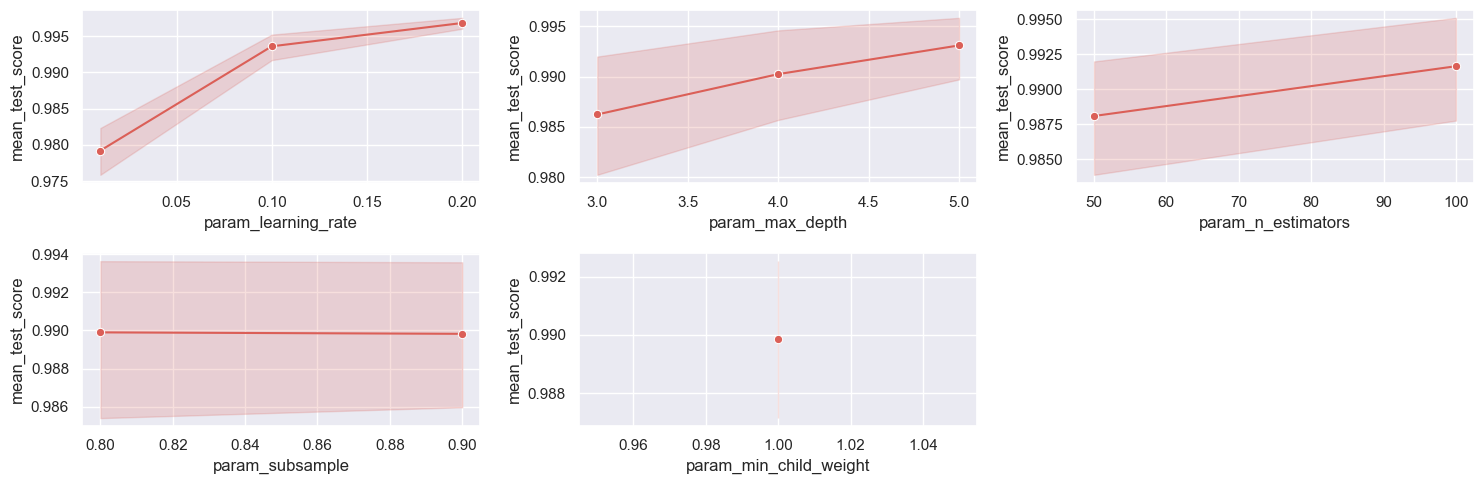

In [89]:
results_gcv = pd.DataFrame(grid_search_xgb.cv_results_)

plt.figure(figsize=(15, 5))

for i, param in enumerate(param_grid):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=f'param_{param}', y='mean_test_score',
                 data=results_gcv, marker='o')
plt.tight_layout()
plt.show()

Preuzeto iz: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [61]:
rfc_random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
}

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_random_grid,
                                n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
rfc_random.fit(X_resampled, y_resampled)
print(rfc_random.best_params_)
print(rfc_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
0.985017126413817


Output je:
```{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}```. Sada formiramo grid za grid search:

In [62]:
rfc_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [1, 2],
    'n_estimators': [300, 400, 500]
}

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_grid,
                        cv=5, verbose=2, n_jobs=-1)
rfc_grid.fit(X_resampled, y_resampled)
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.9848986878289979


Random Forest (optimized):DONE; XGBoost (optimized):DONE; 

,CV-AUC,CV-Accuracy,CV-F1,CV-Precision,CV-Recall,CV-LogLoss,AUC,Accuracy,F1
Algorithm,,,,,,,,,
XGBoost (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.945859,0.887463,0.628667
Random Forest (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.942115,0.886447,0.621186


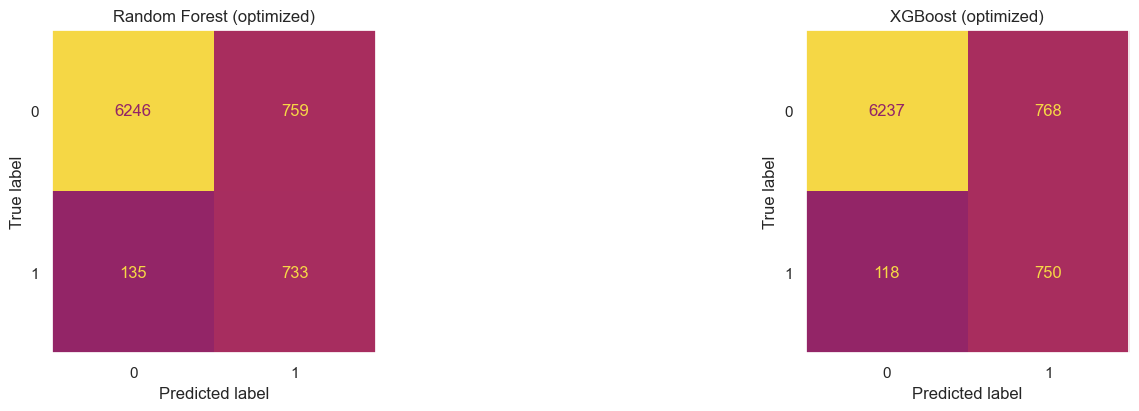

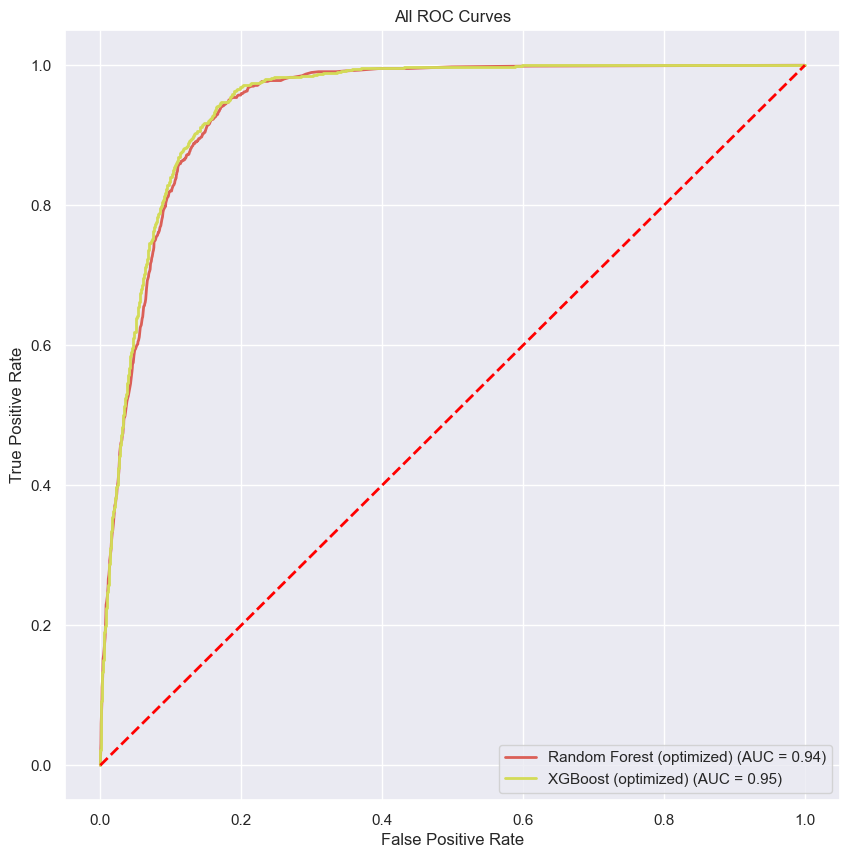

In [77]:
hp_optimized_models = {
    'Random Forest (optimized)': RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'XGBoost (optimized)': XGBClassifier(learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9),
}
results = test_models(hp_optimized_models, X_resampled,
                      X_test, y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [ ]:
rfc_param_grid = {'bootstrap': [True, False],
                  'max_depth': [10,  40, 100, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [100, 200, 500, 1000, 1500],
                  'n_jobs': [-1],
                  'verbose': [10],
                  }
rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid,
                               cv=5, scoring='roc_auc', n_jobs=-1, verbose=10)
grid_search_rfc.fit(X_resampled, y_resampled)

In [ ]:
rfc_param_grid = {'bootstrap': [True, False],
                  'max_depth': [10,  40, 100, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [100, 200, 500, 1000, 1500],
                  'n_jobs': [-1],
                  'verbose': [10],
                  }


rfc_param_random = {'bootstrap': [True, False],
                    'max_depth': [10,  40, 100, None],
                    'max_features': ['auto', 'sqrt'],
                    'min_samples_leaf': [2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [100, 200, 500, 1000, 1500],
                    'n_jobs': [-1],
                    'verbose': [10],
                    }
rfc = RandomForestClassifier()

randomized_search_rfc = RandomizedSearchCV(
    estimator=rfc, param_distributions=rfc_param_random,
    cv=5, scoring='roc_auc', n_jobs=-1, verbose=10)

randomized_search_rfc.fit(X_resampled, y_resampled)

print(randomized_search_rfc.best_params_)
print(randomized_search_rfc.best_score_)

best_params_random = randomized_search_rfc.best_params_

for k in rfc_param_grid.keys():
    if k != 'bootstrap':
        rfc_param_grid[k] = [item for item in rfc_param_grid[k]
                             if (item == None or item <= best_params_random[k])]
    else:
        rfc_param_grid[k] = [best_params_random[k],]

grid_search_rfc = GridSearchCV(
    estimator=rfc, param_grid=rfc_param_grid,
    cv=5, scoring='roc_auc', n_jobs=-1, verbose=10)

grid_search_rfc.fit(X_resampled, y_resampled)

print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

In [ ]:
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)
results_gcv = pd.DataFrame(grid_search_rfc.cv_results_)
plt.figure(figsize=(15, 5))
for i, param in enumerate(rfc_param_grid):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=f'param_{param}', y='mean_test_score',
                 data=results_gcv, marker='o')

## Feature Selection

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.pipeline import Pipeline

transformer = GenericUnivariateSelect(chi2, mode='k_best')

clf = Pipeline([
    ('feature_selection', GenericUnivariateSelect(chi2, mode='k_best')),
    ('classification', RandomForestClassifier())
])
clf.fit_transform(X, y)

### Feature Importance

In [83]:
feat_importances_df = pd.DataFrame(
    columns=['Random Forest (optimized)', 'XGBoost (optimized)', 'Lasso'])

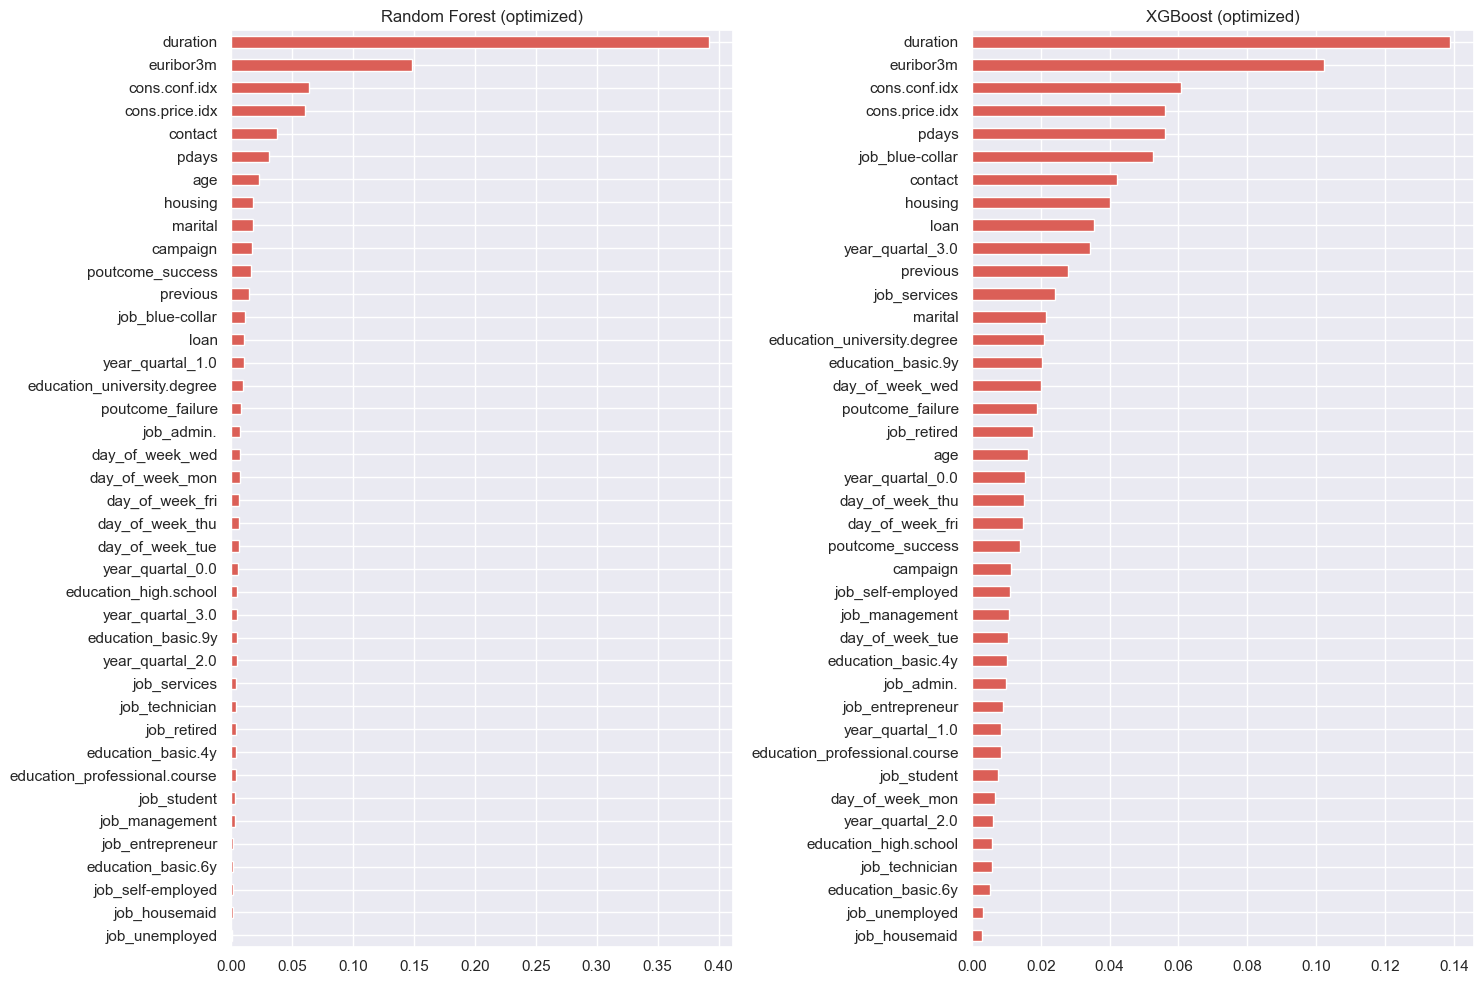

In [84]:
plt.figure(figsize=(15, 10))
for i, name in enumerate(hp_optimized_models):
    classifier = hp_optimized_models[name]
    feat_importances = pd.Series(
        classifier.feature_importances_, index=X.columns)
    plt.subplot(1, len(hp_optimized_models), i+1)
    feat_importances_df[name] = feat_importances
    feat_importances.sort_values().plot(kind='barh')
    plt.title(name)
plt.tight_layout()
plt.show()

#### Lasso Regression

In [85]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_resampled, y_resampled)

lasso1_coef = np.abs(lasso1.coef_)
pd_lasso1 = pd.DataFrame(lasso1_coef, index=X.columns, columns=['coef'])
pd_lasso1.sort_values(by='coef', ascending=False, inplace=True)
feat_importances_df['Lasso'] = pd_lasso1['coef']

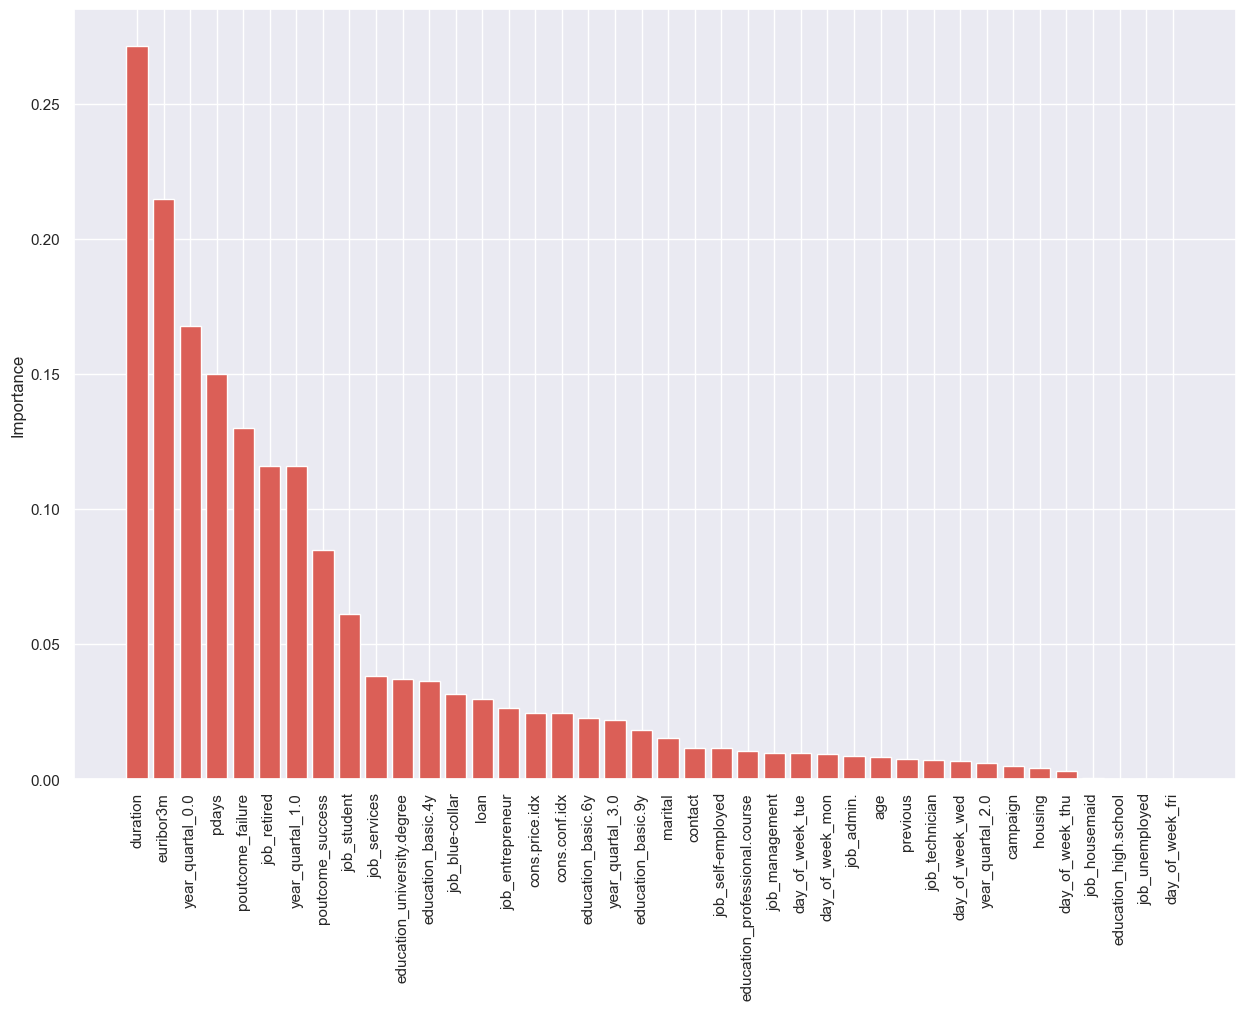

In [86]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(pd_lasso1.index, pd_lasso1['coef'])
plt.ylabel("Importance")
plt.show()

In [90]:
feat_importances_df.sort_values(
    by='Lasso', ascending=False)

,Random Forest (optimized),XGBoost (optimized),Lasso
duration,0.392169,0.138883,2.715648e-01
euribor3m,0.148554,0.102345,2.147908e-01
year_quartal_0.0,0.005727,0.015330,1.679164e-01
pdays,0.031171,0.056057,1.499044e-01
poutcome_failure,0.008314,0.019038,1.300918e-01
job_retired,0.004263,0.017757,1.159644e-01
year_quartal_1.0,0.010407,0.008499,1.158711e-01
poutcome_success,0.016366,0.013990,8.487309e-02
job_student,0.003706,0.007681,6.106135e-02
job_services,0.004485,0.024185,3.804009e-02


In [97]:
importance_threshold = 0.03
unimportant_features = feat_importances_df[
    (feat_importances_df['Random Forest (optimized)'] < importance_threshold) &
    (feat_importances_df['XGBoost (optimized)'] < importance_threshold) &
    (feat_importances_df['Lasso'] < importance_threshold)]\
    .sort_values(by='Lasso', ascending=False)
unimportant_features

,Random Forest (optimized),XGBoost (optimized),Lasso
job_entrepreneur,0.002129,0.008931,2.648459e-02
education_basic.6y,0.002014,0.005372,2.277379e-02
education_basic.9y,0.005263,0.020328,1.830048e-02
marital,0.018200,0.021620,1.507368e-02
job_self-employed,0.001925,0.010988,1.137353e-02
education_professional.course,0.003994,0.008476,1.038339e-02
job_management,0.003628,0.010918,9.674620e-03
day_of_week_tue,0.006786,0.010592,9.616215e-03
day_of_week_mon,0.007333,0.006693,9.239211e-03
job_admin.,0.007745,0.009829,8.765798e-03


In [98]:
X_resampled_fi = X_resampled.drop(unimportant_features.index, axis=1)
X_test_fi = X_test.drop(unimportant_features.index, axis=1)

Random Forest (optimized + FI):DONE; XGBoost (optimized + FI):DONE; 

,CV-AUC,CV-Accuracy,CV-F1,CV-Precision,CV-Recall,CV-LogLoss,AUC,Accuracy,F1
Algorithm,,,,,,,,,
XGBoost (optimized + FI),NaN,NaN,NaN,NaN,NaN,NaN,0.945482,0.871459,0.604687
XGBoost (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.944608,0.883145,0.623876
Random Forest (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.938619,0.886193,0.618399
Random Forest (optimized + FI),NaN,NaN,NaN,NaN,NaN,NaN,0.93294,0.882764,0.612348


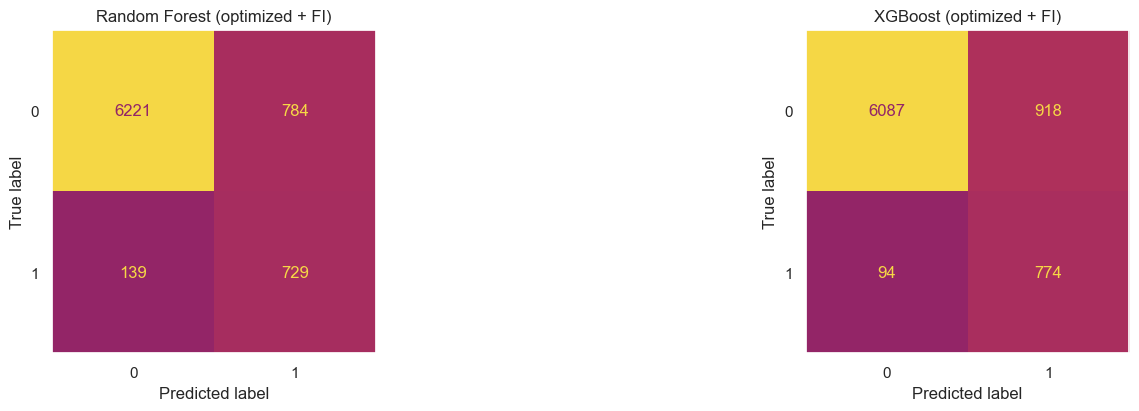

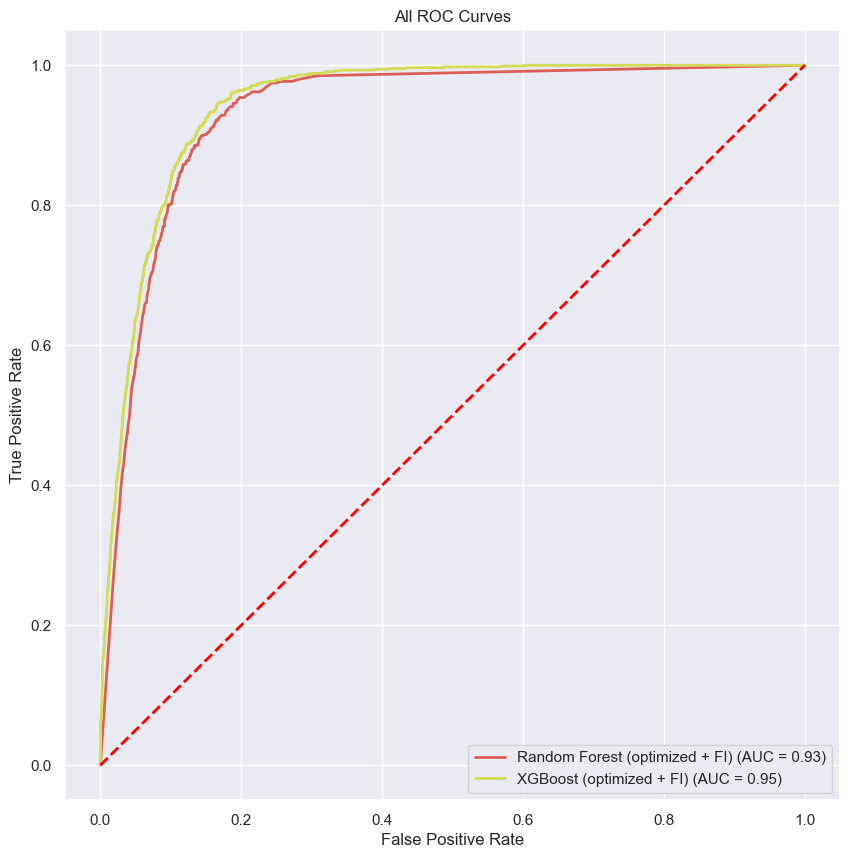

In [99]:
classifiers_optimozed_fi = {
    'Random Forest (optimized + FI)': RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'XGBoost (optimized + FI)': XGBClassifier(learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9),
}

results = test_models(classifiers_optimozed_fi, X_resampled_fi,
                      X_test_fi, y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

### Dimensionality Reduction

In [68]:
df.shape

(39364, 41)

#### PCA

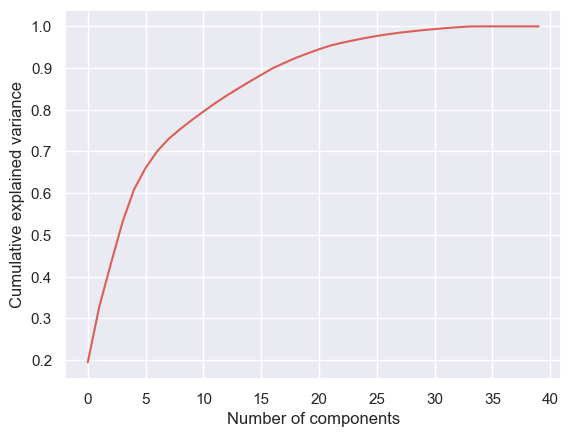

In [70]:
from sklearn.decomposition import PCA

pca = PCA(random_state=4242)
X_pca_train = pca.fit_transform(X_resampled)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [74]:
pca_95 = PCA(n_components=0.95, random_state=4242)
X_pca_train = pca_95.fit_transform(X_resampled)
X_pca_test = pca_95.transform(X_test)
X_pca_train.shape

(50657, 22)

Random Forest (PCA):DONE; XGBoost (PCA):DONE; 

,CV-AUC,CV-Accuracy,CV-F1,CV-Precision,CV-Recall,CV-LogLoss,AUC,Accuracy,F1
Algorithm,,,,,,,,,
XGBoost (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.944673,0.886828,0.621012
Random Forest (optimized),NaN,NaN,NaN,NaN,NaN,NaN,0.941283,0.890512,0.62684
Random Forest (PCA),NaN,NaN,NaN,NaN,NaN,NaN,0.935146,0.865998,0.589973
XGBoost (PCA),NaN,NaN,NaN,NaN,NaN,NaN,0.933887,0.866379,0.583861


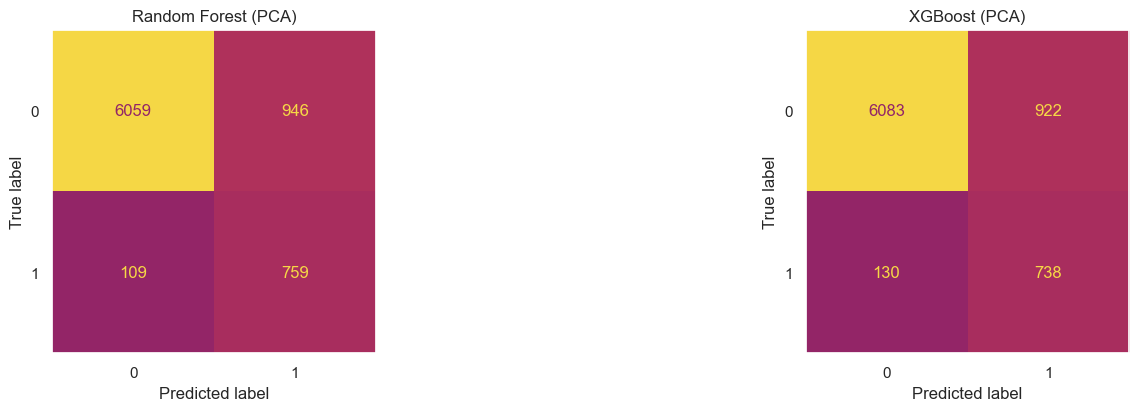

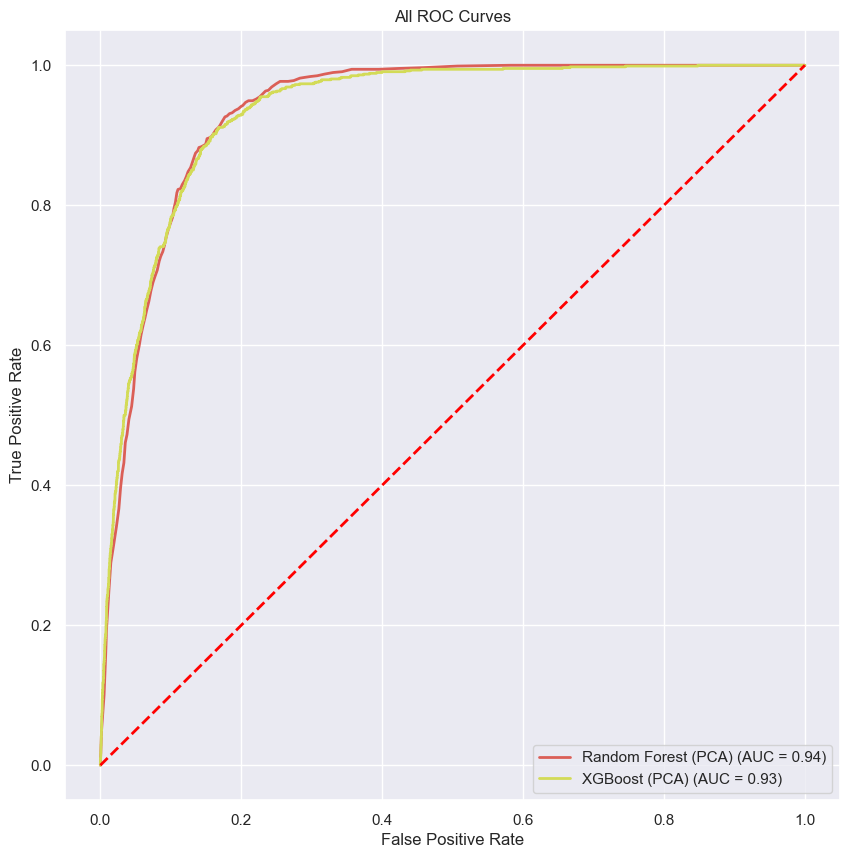

In [76]:
models = {
    'Random Forest (PCA)': RandomForestClassifier(),
    'XGBoost (PCA)': XGBClassifier(),
}
results = test_models(models, X_pca_train, X_pca_test,
                      y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

#### Manifold learning

In [60]:
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import pairwise_distances


##### t-SNE (t-distributed Stochastic Neighbor Embedding)

##### Isomap

In [61]:
isomap = Isomap(n_components=2, n_neighbors=5, n_jobs=-1)
X_isomap_train = isomap.fit_transform(X_resampled)
X_isomap_test = isomap.transform(X_test)

models = {
    'Random Forest (Isomap)': RandomForestClassifier(),
    'XGBoost (Isomap)': XGBClassifier(),
}
results = test_models(models, X_isomap_train, X_isomap_test,
                      y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [68]:
from sklearn.feature_selection import SelectFromModel


sel = SelectFromModel(LogisticRegression(
    C=1, penalty='l2', solver='saga', random_state=42))
sel.fit(X_resampled, y_resampled)
sel.get_support()

removed_feats = X_resampled.columns[(
    sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')